## ✅ Problem 1 Overview

### 📌 Task  
Given a string of digits from `'2'` to `'9'`, generate all possible letter combinations it could represent (like on a phone keypad).

---

### ➕ Example Inputs and Outputs

- **Input:** `"23"`  
  **Output:** `["ad", "ae", "af", "bd", "be", "bf", "cd", "ce", "cf"]`

- **Input:** `""`  
  **Output:** `[]`

- **Input:** `"2"`  
  **Output:** `["a", "b", "c"]`

---

### 📏 Constraints

- `0 <= digits.length <= 4`
- Each `digit[i]` is a character in the range `'2'` to `'9'`


In [2]:
from typing import List
def letter_combinations(digits: str) -> List[str]:
    """
    Generate all possible letter combinations from a digit string using 
    telepone button mapping (digits only 2-9) 

    :param digits: A string containing digits from '2' to '9'.
    :return: A list of of all valid letter combinations that the input could represent.
    """
    
    # cornor case
    if not digits:
        return []
        
    # mapping digits to letters
    phone_map = {
        "2": "abc", "3": "def",  "4": "ghi", "5": "jkl",
        "6": "mno", "7": "pqrs", "8": "tuv", "9": "wxyz"
    }

    # check input constraints
    if any(d not in phone_map for d in digits):
        raise ValueError("Input digits must be in the range '2' to '9' only.")

    result = []
    # Recursive backtracking function to build combinations
    def backtrack(index, next_digits):
        # No more digits 
        if index == len(digits):
            result.append(next_digits)
            return # Stop further recursion for this branch 
        
        # Get letters for current digit
        possible_letters = phone_map[digits[index]]
        for letter in possible_letters:
            backtrack(index+1, next_digits+letter)

    # start the backtracking
    backtrack(0, "")
    return result
        
    

In [3]:
from pprint import pprint

# ✅ Test Case 1: Basic input
print("Test Case 1: digits = '2'")
pprint(letter_combinations("2"))
# Expected: ['a', 'b', 'c']

# ✅ Test Case 2: Two digits
print("\nTest Case 2: digits = '23'")
pprint(letter_combinations("23"))
# Expected: ["ad", "ae", "af", "bd", "be", "bf", "cd", "ce", "cf"]

# ✅ Test Case 3: Three digits
print("\nTest Case 3: digits = '234'")
pprint(letter_combinations("234"))
# Expected: 3 x 3 x 3 = 27 combinations

# ✅ Test Case 4: Empty input
print("\nTest Case 4: digits = ''")
pprint(letter_combinations(""))
# Expected: []

# ✅ Test Case 5: Invalid input (contains '1')
try:
    print("\nTest Case 5: digits = '213'")
    pprint(letter_combinations("213"))
except ValueError as e:
    print("Caught ValueError:", e)
# Expected: ValueError

# ✅ Test Case 6: Long valid string
print("\nTest Case 6: digits = '79'")
pprint(letter_combinations("79"))
# Expected: 4 letters from '7' x 4 letters from '9' = 16 combinations

# ✅ Test Case 7: All digits from 2–9
print("\nTest Case 7: digits = '23456789'")
combinations = letter_combinations("23456789")
print("Total combinations:", len(combinations))
# Expected: 3x3x3x3x3x4x3x4 = 3888 combinations


Test Case 1: digits = '2'
['a', 'b', 'c']

Test Case 2: digits = '23'
['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']

Test Case 3: digits = '234'
['adg',
 'adh',
 'adi',
 'aeg',
 'aeh',
 'aei',
 'afg',
 'afh',
 'afi',
 'bdg',
 'bdh',
 'bdi',
 'beg',
 'beh',
 'bei',
 'bfg',
 'bfh',
 'bfi',
 'cdg',
 'cdh',
 'cdi',
 'ceg',
 'ceh',
 'cei',
 'cfg',
 'cfh',
 'cfi']

Test Case 4: digits = ''
[]

Test Case 5: digits = '213'
Caught ValueError: Input digits must be in the range '2' to '9' only.

Test Case 6: digits = '79'
['pw',
 'px',
 'py',
 'pz',
 'qw',
 'qx',
 'qy',
 'qz',
 'rw',
 'rx',
 'ry',
 'rz',
 'sw',
 'sx',
 'sy',
 'sz']

Test Case 7: digits = '23456789'
Total combinations: 11664


## ✅ Summary of Backtracking Algorithm (Used in Letter Combinations)

### 🔁 What is Backtracking?
Backtracking is a **recursive technique** used to build solutions incrementally. 
At each step, it explores all possible choices and **"backtracks"** if a path doesn't lead to a solution.

---

### ⚙️ How It Works in This Problem:
1. Start from the first digit in the input string.
2. For each possible letter mapped to that digit:
   - Append the letter to a temporary string.
   - Recursively move to the next digit.
3. When all digits are processed (base case), add the combination to the result list.
4. Backtrack to try other letter options for previous digits.

---

### 🔄 Key Idea:
This forms a **decision tree**, where:
- Each level represents a digit in the input.
- Each branch represents a letter mapped from that digit.
- Each leaf node is a full combination.

---

### 🧠 Example for `"23"`:

```sql
      ""        (start)
    /  |  \
  a    b    c       ← letters for '2'
 /|\  /|\  /|\
d e f d e f d e f   ← letters for '3'

✅ Final combinations:
```

["ad", "ae", "af", "bd", "be", "bf", "cd", "ce", "cf"]

---

### 💡 Why Use Backtracking?
- Ensures **complete exploration** of all valid combinations.
- Avoids unnecessary recomputation.
- Ideal for problems involving **combinations, permutations, and subsets**.

---

## ✅ Problem 2 Overview

### 📌 Task  
Given two tables — `Customer` and `Product` — return the `customer_id`s of customers who bought **all** the products listed in the `Product` table.

---

### 📂 Tables

#### 🧾 Customer Table
| Column Name | Type |
|-------------|------|
| customer_id | int  |
| product_key | int  |

- May contain **duplicate rows**.
- `product_key` is a **foreign key** referencing the `Product` table.

#### 🧾 Product Table
| Column Name | Type |
|-------------|------|
| product_key | int  |

- `product_key` is the **primary key** in this table.

---

### 🎯 Objective 
Identify all `customer_id` who have purches **every product** in the `Product` Table.

---

### ✔️ SQL Solution


```sql
SELECT customer_id
FROM Customer
Group By customer_id
HAVING COUNT(DISTINCT product_key) == (SELECT COUNT(*) FROM Product);
```

---

### ✅ Explanation
* `COUNT(DISTINCT product_key)` counts how many unique product each customer bought.
* `(SELECT COUNT(*) FROM Product)` gets the total number of product available.
* We only return `customer_id`s where the count match --- meaning they bought all the products

## ✅ Problem 3 Overview

### 📌 Task  
Write a Bash command or script to **print the 10th line** of a text file named `file.txt`.

---

### 🎯 Objective  
Output only the 10th line:

---

### ✅ Recommended Bash Command
```bash
sed -n 10p filename.txt  
```

---

### 📖 Explanation of `sed -n 10p file.txt`

- `sed`: A powerful **stream editor** used for parsing and transforming text in Unix/Linux.

- `-n`:  
  Suppresses the default behavior of printing every line.  
  Without `-n`, `sed` prints all lines by default.

- `10p`:  
  `p` stands for **print**. This tells `sed` to print **only the 10th line**.

🔹 Together, `sed -n 10p` means:
> “Don’t print anything except the 10th line from the file.”

---

## ✅ Problem 4 Overview

### 📌 Task  
Below are given three Python classes that localize specific words (`"car"`, `"bike"`, `"cycle"`) into **French**, **Spanish**, and **English**.

You are also provided with **two implementations** that use these classes.  
Your goal is to **compare both implementations** and explain which is **better** and **why**.

---

### 🧾 Provided Classes

```python
class FrenchLocalizer:
    def __init__(self):
        self.translations = {"car": "voiture", "bike": "bicyclette", "cycle": "cyclette"}
    def localize(self, msg):
        return self.translations.get(msg, msg)

class SpanishLocalizer:
    def __init__(self):
        self.translations = {"car": "coche", "bike": "bicicleta", "cycle": "ciclo"}
    def localize(self, msg):
        return self.translations.get(msg, msg)

class EnglishLocalizer:
    def localize(self, msg):
        return msg
```

___

### 🔁 Implementation 1
```python
if __name__ == "__main__":
    f = FrenchLocalizer()
    e = EnglishLocalizer()
    s = SpanishLocalizer()

    for msg in ["car", "bike", "cycle"]:
        print(f.localize(msg))
        print(e.localize(msg))
        print(s.localize(msg))
```

### 🧠 Implementation 2
```python
def Localizer(language="English"):
    localizers = {
        "French": FrenchLocalizer,
        "English": EnglishLocalizer,
        "Spanish": SpanishLocalizer,
    }
    return localizers[language]()

if __name__ == "__main__":
    f = Localizer("French")
    e = Localizer("English")
    s = Localizer("Spanish")

    for msg in ["car", "bike", "cycle"]:
        print(f.localize(msg))
        print(e.localize(msg))
        print(s.localize(msg))
```


## ✅ Comparison and Recommendation

### ✔️ **Implementation 2 is Better** — Here's Why:

| Criteria            | Implementation 1               | Implementation 2                |
|---------------------|--------------------------------|---------------------------------|
| **Scalability**     | Hardcoded per language         | Easy to extend via dictionary   |
| **Maintainability** | Manual and repetitive instantiation | Centralized factory pattern |
| **Flexibility**     | Limited to static languages     | Dynamic language handling       |
| **Code Duplication**| High                           | Minimal                         |
| **Readability**     | Cluttered                      | Clean and modular               |
| **Memory Usage**    | Slightly higher (3 instances created explicitly) | Efficient via dynamic instantiation |
| **Space Complexity**| Static, not easily configurable | Encapsulated and extendable     |

---

## 🏆 Conclusion  

**Implementation 2** is the **preferred solution** due to its:

- **Cleaner structure**
- **Better memory handling** (only instantiates what's requested)
- **Lower space coupling** (localizer types are decoupled via a dictionary)
- **Scalability and flexibility** (easy to add new languages or replace localizers)

It follows better **software design principles**:  
✔️ Encapsulation  
✔️ Abstraction  
✔️ Reusability  
✔️ Maintainability  

Overall, Implementation 2 is better in terms of both **design clarity** and **resource efficiency**.


## ✅ Problem 5 Overview

### 📌 Task  
Design a Python-based object detection system using the [Road Sign Detection dataset](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection).

You must build and compare **two different object detection models**, analyze their performance, and determine the more suitable model for this problem.

---

### 🎯 Objective  
- Build an object detection pipeline that can identify **road signs** in images.
- Use **two different models**.
- Evaluate the models using meaningful metrics and visual outputs.
- Justify the final model selection based on performance, speed, and real-world applicability.

---

### 🧩 Dataset Overview  
- **Source**: [Kaggle - Road Sign Detection](https://www.kaggle.com/datasets/andrewmvd/road-sign-detection)  
- **Images**: ~900 JPEG images of road signs  
- **Annotations**: PASCAL VOC XML format  

---

### 📌 Guidelines
- You may use **pretrained models** or fine-tune them.
- Use metrics like **mAP**, **IoU**, **inference time**, etc., to compare models.
- Visualize results and provide qualitative comparisons (e.g., bounding boxes).
- You are free to explore helpful resources, tools, and notebooks to support your solution.
- Keep the solution **focused, practical, and insightful** – no need to test every model.

---


## 🚀 Solution Model : YOLOv11 (You Only Look Once v11)

### 🔍 Introduction
**YOLOv11** is the latest version of the YOLO (You Only Look Once) object detection family, released on **September 27, 2024**. It is designed for **real-time object detection** with a strong balance between speed and accuracy, leveraging recent innovations in transformer backbones, improved decoders, and more efficient training pipelines.

---

### ⚙️ YOLOv11 Variants Used
To analyze performance vs. speed trade-offs, we will evaluate the following YOLOv11 model variants:

| Variant     | Description                              | Parameters (approx.) | Speed      | Accuracy   |
|-------------|------------------------------------------|----------------------|------------|------------|
| `YOLOv11-n` | Nano version – smallest, fastest         | ~1.9M                | 🚀 Fastest | 🔸 Lower    |
| `YOLOv11-s` | Small version – good trade-off           | ~7.9M                | ⚡ Fast     | ✅ Balanced |
| `YOLOv11-m` | Medium version – more accurate, slower   | ~25M                 | 🐢 Slower  | 🔥 Higher   |

---

### 📦 Why YOLOv11?
- 📈 **Modern Architecture**: Built with attention-based backbones and dynamic head modules.
- ⚡ **Real-Time Ready**: Ideal for edge devices, cameras, or traffic systems.
- 🔁 **Versatile**: Supports multiple input sizes, hardware acceleration, and ONNX export.

---

### 🧪 Experiment Plan
We will:
1. Train or fine-tune each of the `n`, `s`, and `m` versions on the **Road Sign Detection** dataset.
2. Evaluate using metrics such as:
   - **mAP@0.5**
   - **mAP@0.5:0.95**
   - **Inference time**
   - **IoU (Intersection over Union)**
3. Compare visual results of predicted bounding boxes.

---

### 📊 Goal
By the end of the YOLOv11 evaluation, we will choose the most **practically suitable** variant among `n`, `s`, and `m` for our dataset, based on a balance of **accuracy**, **speed**, and **deployment potential**.



In [4]:
%pip install ultralytics pandas matplotlib seaborn scikit-learn
import ultralytics
ultralytics.checks()

Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6362.0/8062.4 GB disk)


## 🔧 Data Preprocessing for YOLOv11

- The dataset provides annotations in **PASCAL VOC (XML)** format.
- YOLOv11 requires annotations in **YOLO format** (`.txt` files).
- Steps to preprocess:

---

### 📌 Steps

- ✅ **Parse XML files** to extract:
  - `filename`
  - `width`, `height` of the image
  - bounding boxes: `xmin`, `ymin`, `xmax`, `ymax`
  - object class (from 4 possible classes)

- 📚 **Class labels** (map to integer IDs):

```python
'traffic_light' → 0
'stop_sign' → 1
'speed_limit' → 2
'crosswalk' → 3
```

- 🔄 **Convert to YOLO format**:
  - Normalize: `x_center`, `y_center`, `width`, `height` (all divided by image width/height)

- 🗂 **Create YOLOv11 directory structure**:

```bash
datasets/road-signs/
├── images/
│ ├── train/
│ ├── val/
│ └── test/
└── labels/
├── train/
├── val/
└── test/
```


- ✂️ **Split dataset**:
- Train: 70%
- Validation: 20%
- Test: 10%

- 📝 **Create `data.yaml` file**:
```yaml
train: datasets/road-signs/images/train
val: datasets/road-signs/images/val
test: datasets/road-signs/images/test

nc: 4
names: ['trafficlight', 'stop', 'speedlimit', 'crosswalk']


In [5]:
import os
import glob
import shutil
import xml.etree.ElementTree as ET
from pathlib import Path
from typing import Dict, Tuple, List
from sklearn.model_selection import train_test_split

# Mapping class names to numeric labels
CLASS_LABELS: Dict[str, int] = {
    'trafficlight': 0,
    'stop': 1,
    'speedlimit': 2,
    'crosswalk': 3
}

def parse_annotation(xml_path: str, label_output_path: str, class_labels: Dict[str, int]) -> None:
    """
    Convert a single Pascal VOC XML annotation to YOLO format and save it.
    """
    tree = ET.parse(xml_path)
    root = tree.getroot()

    size_element = root.find('size')
    image_width = int(size_element.find('width').text)
    image_height = int(size_element.find('height').text)

    output_lines = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text.lower()
        if class_name not in class_labels:
            print(f"[Warning] Skipping unknown class: {class_name}")
            continue

        class_id = class_labels[class_name]
        bbox = obj.find('bndbox')
        xmin = float(bbox.find('xmin').text)
        ymin = float(bbox.find('ymin').text)
        xmax = float(bbox.find('xmax').text)
        ymax = float(bbox.find('ymax').text)

        x_center = ((xmin + xmax) / 2) / image_width
        y_center = ((ymin + ymax) / 2) / image_height
        width = (xmax - xmin) / image_width
        height = (ymax - ymin) / image_height

        output_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    with open(label_output_path, 'w') as label_file:
        label_file.write("\n".join(output_lines))

def prepare_yolo_dataset(
    annotations_dir: str,
    images_dir: str,
    output_dir: str,
    class_labels: Dict[str, int],
    split_ratios: Tuple[float, float, float] = (0.7, 0.20, 0.10)
) -> None:
    """
    Organizes dataset into YOLO format with train/val/test splits and converts annotations.
    """
    os.makedirs(output_dir, exist_ok=True)
    for split in ['train', 'valid', 'test']:
        os.makedirs(os.path.join(output_dir, split, 'images'), exist_ok=True)
        os.makedirs(os.path.join(output_dir, split, 'labels'), exist_ok=True)

    xml_files = glob.glob(os.path.join(annotations_dir, '*.xml'))
    base_names = [os.path.splitext(os.path.basename(f))[0] for f in xml_files]

    train_names, temp_names = train_test_split(base_names, train_size=split_ratios[0], random_state=42)
    val_ratio_adj = split_ratios[1] / (split_ratios[1] + split_ratios[2])
    val_names, test_names = train_test_split(temp_names, train_size=val_ratio_adj, random_state=42)

    split_mapping = {'train': train_names, 'valid': val_names, 'test': test_names}

    for split_name, names in split_mapping.items():
        for name in names:
            xml_path = os.path.join(annotations_dir, f"{name}.xml")
            image_found = False

            # Save label in YOLO format
            label_output_path = os.path.join(output_dir, split_name, 'labels', f"{name}.txt")
            if os.path.exists(xml_path):
                parse_annotation(xml_path, label_output_path, class_labels)

            # Copy image file
            for ext in ['.jpg', '.jpeg', '.png']:
                image_path = os.path.join(images_dir, f"{name}{ext}")
                if os.path.exists(image_path):
                    shutil.copy(image_path, os.path.join(output_dir, split_name, 'images'))
                    image_found = True
                    break
            if not image_found:
                print(f"[Warning] Image not found for: {name}")

    # Print dataset stats
    for split in ['train', 'valid', 'test']:
        img_count = len(os.listdir(os.path.join(output_dir, split, 'images')))
        print(f"{split.capitalize()} set: {img_count} images")

if __name__ == '__main__':
    annotations_path = '/kaggle/input/road-sign-detection/annotations'
    images_path = '/kaggle/input/road-sign-detection/images'
    yolo_output_path = '/kaggle/working/road-sign-dataset'

    print("[INFO] Starting dataset conversion to YOLO format...")
    prepare_yolo_dataset(
        annotations_dir=annotations_path,
        images_dir=images_path,
        output_dir=yolo_output_path,
        class_labels=CLASS_LABELS
    )
    print("[INFO] Conversion completed successfully.")


[INFO] Starting dataset conversion to YOLO format...
Train set: 613 images
Valid set: 176 images
Test set: 88 images
[INFO] Conversion completed successfully.


## 🖼️ Displaying Random Samples with Bounding Boxes
After dataset creation, you can visualize sample images from each split using ```matplotlib``` and ```OpenCV```:


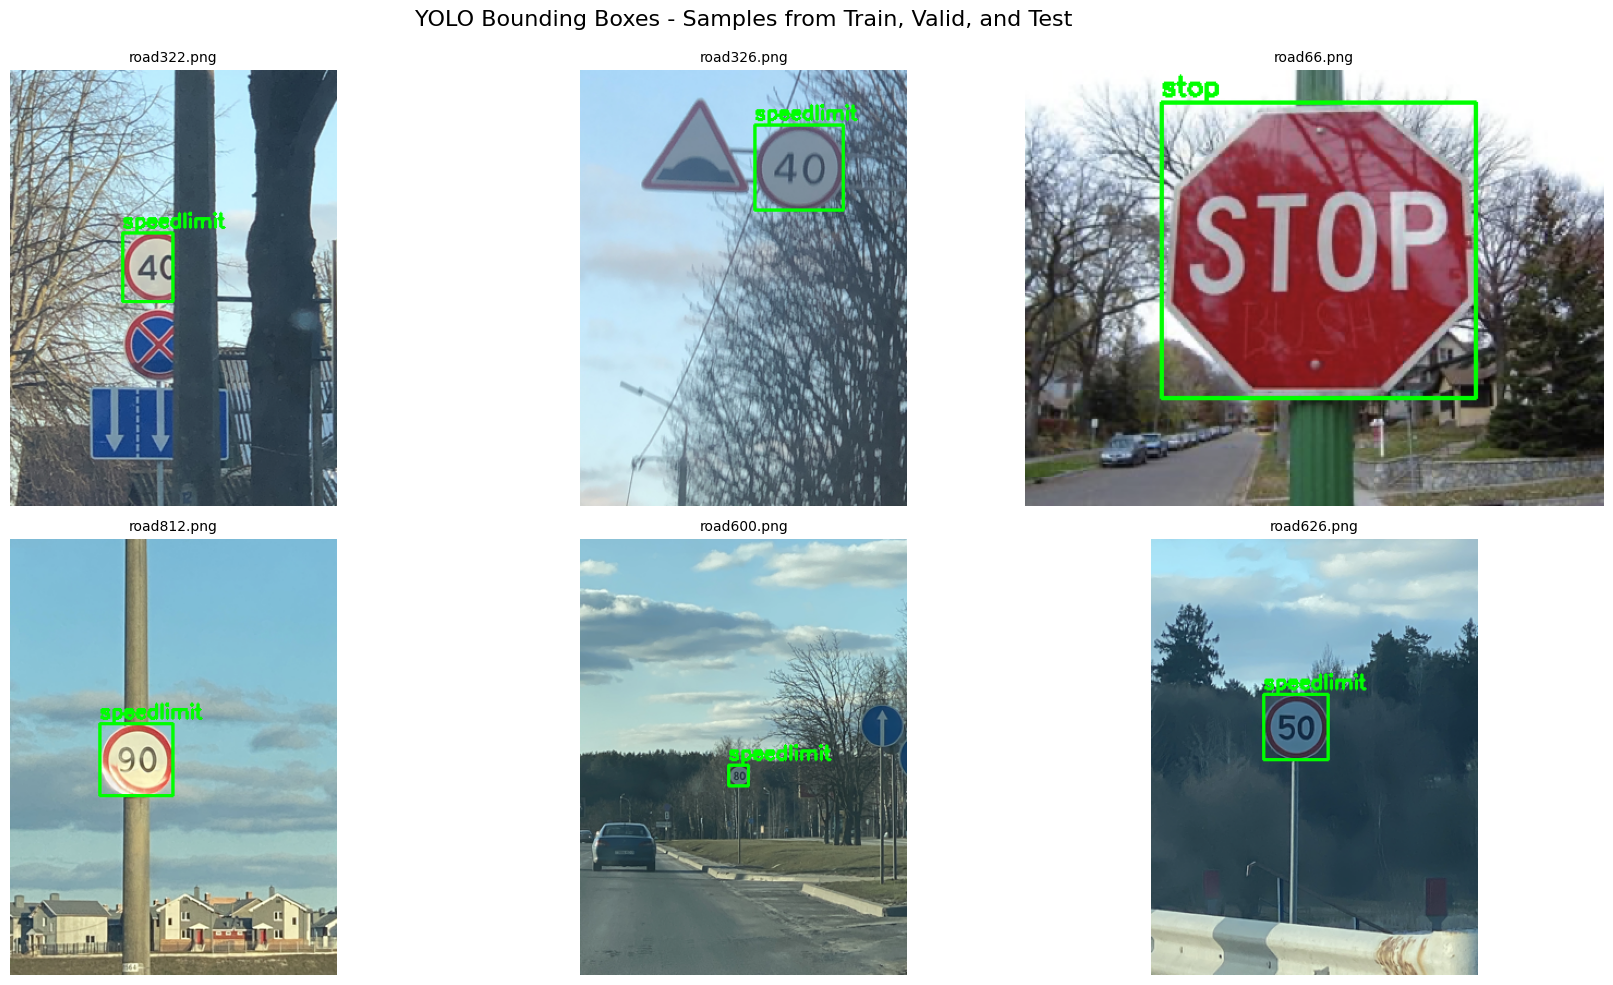

In [6]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple

def draw_yolo_bboxes(image_path: str, label_path: str, class_map: Dict[str, int]) -> Tuple[str, any]:
    """Loads image and overlays YOLO-format bounding boxes with class labels."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Cannot read image: {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_height, img_width, _ = image.shape

    if not os.path.exists(label_path):
        print(f"[WARNING] Missing label for {image_path}")
        return os.path.basename(image_path), image

    with open(label_path, 'r') as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())

            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height

            xmin = int(x_center - width / 2)
            ymin = int(y_center - height / 2)
            xmax = int(x_center + width / 2)
            ymax = int(y_center + height / 2)

            label = [k for k, v in class_map.items() if v == int(class_id)][0]
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(image, label, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    return os.path.basename(image_path), image

def get_random_files_from_split(base_path: str, split: str, count: int = 2) -> List[Tuple[str, str]]:
    """Fetches a list of random (image_path, label_path) pairs from a split."""
    image_dir = os.path.join(base_path, split, 'images')
    label_dir = os.path.join(base_path, split, 'labels')

    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    selected = random.sample(image_files, min(count, len(image_files)))
    return [(os.path.join(image_dir, f), os.path.join(label_dir, os.path.splitext(f)[0] + '.txt')) for f in selected]

def show_sample_grid_from_all_splits(base_path: str, class_labels: Dict[str, int]) -> None:
    """Displays 6 images (2 per split) with bounding boxes in a 2x3 grid."""
    all_samples = []
    for split in ['train', 'valid', 'test']:
        all_samples.extend(get_random_files_from_split(base_path, split, count=2))

    plt.figure(figsize=(18, 10))
    for idx, (img_path, lbl_path) in enumerate(all_samples, 1):
        title, annotated_img = draw_yolo_bboxes(img_path, lbl_path, class_labels)
        plt.subplot(2, 3, idx)
        plt.imshow(annotated_img)
        plt.title(title, fontsize=10)
        plt.axis('off')

    plt.suptitle("YOLO Bounding Boxes - Samples from Train, Valid, and Test", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()

# === Example Usage ===
CLASS_LABELS = {
    'trafficlight': 0,
    'stop': 1,
    'speedlimit': 2,
    'crosswalk': 3
}

show_sample_grid_from_all_splits(
    base_path='/kaggle/working/road-sign-dataset',
    class_labels=CLASS_LABELS
)


# 📌 YOLO Dataset Visualization Script Summary

## 🎯 Purpose
This script is designed to **visualize and verify annotations** in YOLO format by:
- Loading 6 random images (2 from each dataset split: `train`, `valid`, `test`)
- Drawing bounding boxes and class labels based on YOLO `.txt` annotation files
- Displaying all images in a **2x3 grid**
- Helping users **visually confirm the correctness** of annotations and dataset structure

---

## 🧩 Key Components

### 1. `draw_yolo_bboxes(...)`
- **Inputs**: `image_path`, `label_path`, and `class_labels` dictionary
- **Functionality**:
  - Loads the image using OpenCV and converts it to RGB
  - Parses YOLO label file (`class_id x_center y_center width height`)
  - Converts normalized YOLO coordinates to absolute pixel values
  - Draws bounding boxes and class labels on the image
- **Output**: Annotated image and filename

---

### 2. `get_random_files_from_split(...)`
- **Inputs**: `split_dir`, `num_samples` (default = 2)
- **Functionality**:
  - Selects a random subset of image files from the given split (`train`, `valid`, or `test`)
  - Finds corresponding label files with the same base filename
- **Output**: List of tuples → `(image_path, label_path)`

---

### 3. `show_sample_grid_from_all_splits(...)`
- **Inputs**: `base_path`, `class_labels`
- **Functionality**:
  - Loads 2 random samples from each of the three dataset splits
  - Annotates each using `draw_yolo_bboxes()`
  - Displays all 6 annotated images in a **2-row, 3-column grid** using `matplotlib`
- **Output**: Inline visualization of YOLO bounding boxes and class names

---


# 🚀 YOLOv11 Training Overview

## 🧠 Model Variants (Selection)

| Model Variant | Size    | Speed     | Accuracy | Use Case                           |
|---------------|---------|-----------|----------|------------------------------------|
| `yolov11n`    | Nano    | ✅ Fastest | ❌ Lower  | Edge devices, real-time detection |
| `yolov11s`    | Small   | ⚖️ Balanced | ✅ Good   | General-purpose detection         |
| `yolov11m`    | Medium  | ❌ Slower  | ✅✅ High | Accuracy-focused applications     |

---

## ⚙️ Recommended Training Parameters

> These are **battle-tested** and widely used for optimal results.

| Parameter       | Recommended Value     | Description                                                                 |
|------------------|------------------------|-----------------------------------------------------------------------------|
| `--img`          | `640`                  | Input image size (balanced for speed and accuracy)                          |
| `--batch`        | `16` or `32`           | Batch size (depends on GPU memory)                                          |
| `--epochs`       | `100` or `150`         | Number of training epochs                                                   |
| `--data`         | `data/road_sign.yaml`  | Path to dataset YAML                                                        |
| `--cfg`          | `models/yolov11s.yaml` | Model config: choose from `n`, `s`, `m`                                     |
| `--weights`      | `''` (or pretrained)   | Use `''` for training from scratch or provide `.pt` for fine-tuning         |
| `--name`         | `yolov11s_run`         | Custom name for this training run                                           |
| `--device`       | `0` or `0,1`           | GPU ID(s); use `cpu` to train without GPU                                   |
| `--workers`      | `4` or `8`             | Number of dataloader workers (parallel loading)                             |
| `--optimizer`    | `AdamW` or `SGD`       | Optimizer (AdamW for faster convergence, SGD for robustness)                |
| `--cos-lr`       | Use `--cos-lr` flag    | Enables cosine learning rate scheduler                                      |
| `--label-smoothing` | `0.1`              | Smooths labels to prevent overconfidence in predictions                     |
| `--patience`     | `20`                   | Early stopping patience                                                     |
| `--cache`        | `ram` or `disk`        | Faster training (use `ram` if memory allows)                                |
| `--single-cls`   | `False` (or `True`)    | Use only one class if needed                                                |

---


In [7]:
import os
import torch
import yaml
import subprocess


In [21]:
# Dataset Dir
dataset_dir = '/kaggle/working/road-sign-dataset'
class_names = ['trafficlight', 'stop', 'speedlimit', 'crosswalk']

# Create yml file
road_sign_yaml = {
    'path': os.path.abspath(dataset_dir),
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': {
        0: 'trafficlight',
        1: 'stop',
        2: 'speedlimit',
        3: 'crosswalk'
    }
}

# Save YAML file
with open('road_sign.yaml', 'w') as f:
    yaml.dump(road_sign_yaml, f)



In [22]:

if torch.cuda.is_available():
    print(f"[🚀] CUDA is available. GPU: {torch.cuda.get_device_name(0)}")
else:
    print("[⚠️] CUDA not available. Training will run on CPU.")



[🚀] CUDA is available. GPU: Tesla T4


In [28]:
import os
from ultralytics import YOLO
# Dataset YAML path
yaml_path = 'road_sign.yaml'

# Model variant mapping
yolo_variants = {
    'n': 'yolo11n.pt',  # nano
    's': 'yolo11s.pt',  # small
    'm': 'yolo11m.pt'   # medium
}

def train_yolov11_variant(yaml_path: str, variant: str):
    """
    Train a specific YOLOv11 variant on the provided dataset.

    Args:
        yaml_path (str): Path to the dataset YAML file.
        variant (str): One of 'n', 's', or 'm' for nano, small, or medium.
    """
    model_weights = yolo_variants.get(variant)
    if not model_weights:
        raise ValueError(f"[❌] Invalid variant '{variant}'. Must be one of {list(yolo_variants.keys())}")

    print(f"\n[🔥] Training YOLOv11-{variant.upper()} variant...")

    model = YOLO(model_weights)

    results = model.train(
        data=yaml_path,
        epochs=100,
        imgsz=640,
        batch=-1,
        optimizer='AdamW',
        lr0=0.001,          
        lrf=0.01,
        cos_lr=True,
        label_smoothing=0.1,
        patience=7,
        cache='ram',
        device=0,  # GPU 0
        workers=8,
        name=f'road_sign_yolov11_{variant}'
    )

    print(f"[✅] Training complete for YOLOv11-{variant.upper()}")
    return results

In [29]:
# Dataset YAML path
yaml_path = 'road_sign.yaml'

# Model variant mapping
yolo_variants = {
    'n': 'yolo11n.pt',  # nano
    's': 'yolo11s.pt',  # small
    'm': 'yolo11m.pt'   # medium
}


In [30]:
model_n = train_yolov11_variant(yaml_path, 'n')  # Train YOLOv11-n
model_s = train_yolov11_variant(yaml_path, 's')  # Train YOLOv11-s
model_m = train_yolov11_variant(yaml_path, 'm')  # Train YOLOv11-s


[🔥] Training YOLOv11-N variant...
WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=road_sign.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=road_sign_yolov11_n, nbs=64, nms=False, opset=None, opt

train: Scanning /kaggle/working/road-sign-dataset/train/labels.cache... 613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 613/613 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (0.5GB RAM): 100%|██████████| 613/613 [00:02<00:00, 289.83it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 5.19G reserved, 0.46G allocated, 9.09G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590620       6.444         1.258         33.92         104.2        (1, 3, 640, 640)                    list
     2590620       12.89         1.418         29.28         97.33        (2, 3, 640, 640)                    list
     2590620       25.78         1.703         33.62         96.75        (4, 3, 640, 640)                    list
     2590620       51.55         2.336         35.58         103.9        (8, 3, 640, 640)                    list
     2590620       103.1         3.550         50.28         116.5       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 25 for CUDA:0 10.58G/14.74G (72%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2976.8±435.6 MB/s, 

train: Scanning /kaggle/working/road-sign-dataset/train/labels.cache... 613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 613/613 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 613/613 [00:02<00:00, 283.06it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1047.4±648.3 MB/s, size: 203.6 KB)


val: Scanning /kaggle/working/road-sign-dataset/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 176/176 [00:01<00:00, 148.18it/s]


Plotting labels to runs/detect/road_sign_yolov11_n/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005859375000000001), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/road_sign_yolov11_n
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.82G     0.8712      2.736      1.021         29        640: 100%|██████████| 25/25 [00:06<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]


                   all        176        255      0.179      0.177     0.0929     0.0702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.41G     0.8267      1.253     0.9984         24        640: 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]

                   all        176        255      0.306      0.039      0.183       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.44G      0.774     0.9709     0.9814         30        640: 100%|██████████| 25/25 [00:06<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.26it/s]

                   all        176        255       0.16      0.598      0.428      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.45G      0.808      0.914     0.9849         30        640: 100%|██████████| 25/25 [00:06<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]

                   all        176        255      0.558      0.281      0.388      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.45G     0.7613     0.8286     0.9884         33        640: 100%|██████████| 25/25 [00:06<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.08it/s]

                   all        176        255      0.375      0.495      0.447      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.45G     0.7321     0.7852     0.9714         34        640: 100%|██████████| 25/25 [00:06<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        176        255      0.795      0.632       0.77      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.45G     0.7105     0.7314     0.9618         32        640: 100%|██████████| 25/25 [00:06<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        176        255      0.904      0.704      0.801      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.45G     0.6907     0.6893     0.9515         40        640: 100%|██████████| 25/25 [00:06<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        176        255      0.841       0.81      0.841      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.45G     0.7002      0.674     0.9541         30        640: 100%|██████████| 25/25 [00:06<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        176        255      0.859       0.81      0.844      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.45G     0.6963     0.6459     0.9444         31        640: 100%|██████████| 25/25 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        176        255      0.883      0.834      0.856      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.46G     0.6606     0.6341     0.9343         31        640: 100%|██████████| 25/25 [00:06<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]

                   all        176        255      0.873      0.861      0.865      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.48G     0.6881     0.6475     0.9478         33        640: 100%|██████████| 25/25 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.89it/s]

                   all        176        255      0.844      0.829      0.843      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.48G     0.6783     0.6219     0.9376         33        640: 100%|██████████| 25/25 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        176        255      0.858      0.829      0.863       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.48G     0.6405      0.591     0.9301         35        640: 100%|██████████| 25/25 [00:06<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        176        255      0.917      0.822      0.866      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       4.5G     0.6405     0.5706     0.9251         22        640: 100%|██████████| 25/25 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.78it/s]

                   all        176        255      0.887      0.852      0.877      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.51G     0.6403     0.5675     0.9103         35        640: 100%|██████████| 25/25 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.86it/s]

                   all        176        255      0.869       0.83      0.888      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.51G     0.6394     0.5697     0.9284         30        640: 100%|██████████| 25/25 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        176        255       0.89      0.818      0.848      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.51G     0.6273     0.5518     0.9101         29        640: 100%|██████████| 25/25 [00:06<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        176        255      0.915      0.822      0.863      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.51G     0.6242     0.5401     0.9176         29        640: 100%|██████████| 25/25 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        176        255      0.925      0.845       0.89      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.51G     0.6163     0.5469     0.9127         41        640: 100%|██████████| 25/25 [00:06<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        176        255       0.95      0.863      0.897      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.51G     0.6289     0.5197      0.909         35        640: 100%|██████████| 25/25 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        176        255      0.895      0.841      0.875      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.51G     0.6281     0.5329     0.9185         33        640: 100%|██████████| 25/25 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        176        255       0.91      0.876      0.897      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.51G     0.5866     0.5046     0.9137         36        640: 100%|██████████| 25/25 [00:06<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.01it/s]

                   all        176        255      0.839      0.829      0.887       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.51G     0.6147     0.5134     0.9109         33        640: 100%|██████████| 25/25 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        176        255      0.878      0.858      0.894      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.51G     0.5966     0.4992     0.9011         35        640: 100%|██████████| 25/25 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        176        255      0.871      0.865      0.889      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.51G     0.5995     0.4919     0.9055         29        640: 100%|██████████| 25/25 [00:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        176        255      0.878      0.879      0.899      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.51G     0.5853     0.4741      0.913         29        640: 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        176        255      0.871      0.872      0.896      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.51G     0.6142     0.4929      0.911         33        640: 100%|██████████| 25/25 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all        176        255       0.93      0.836      0.878      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.51G      0.598     0.4792     0.8972         46        640: 100%|██████████| 25/25 [00:06<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.84it/s]

                   all        176        255      0.944      0.874      0.903      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.51G     0.6075     0.4727     0.9012         38        640: 100%|██████████| 25/25 [00:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.91it/s]

                   all        176        255       0.93      0.851        0.9      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.51G     0.5828     0.4732     0.8973         30        640: 100%|██████████| 25/25 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        176        255      0.918      0.858      0.889      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.51G     0.5976     0.4618     0.8944         40        640: 100%|██████████| 25/25 [00:06<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]

                   all        176        255      0.913      0.864      0.895      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.51G     0.5843     0.4616     0.8975         39        640: 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        176        255      0.876      0.864      0.893      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.51G     0.5653     0.4517     0.8929         48        640: 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]

                   all        176        255       0.89      0.836      0.857      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.51G      0.582     0.4493     0.9032         44        640: 100%|██████████| 25/25 [00:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        176        255      0.902      0.877      0.897      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.51G     0.5712     0.4324     0.8902         26        640: 100%|██████████| 25/25 [00:06<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        176        255      0.936      0.878        0.9      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.51G     0.5836     0.4329     0.8957         30        640: 100%|██████████| 25/25 [00:06<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        176        255      0.941      0.886       0.91      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.51G     0.5611     0.4332     0.8911         40        640: 100%|██████████| 25/25 [00:06<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        176        255      0.937      0.878      0.927      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.51G     0.5498     0.4314     0.8818         38        640: 100%|██████████| 25/25 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]

                   all        176        255      0.913       0.89      0.896       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.51G     0.5486     0.4158     0.8811         23        640: 100%|██████████| 25/25 [00:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        176        255      0.899      0.864      0.894      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.51G     0.5715     0.4229     0.8877         43        640: 100%|██████████| 25/25 [00:06<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        176        255      0.932      0.829      0.884      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.51G     0.5543      0.429     0.8899         24        640: 100%|██████████| 25/25 [00:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        176        255      0.903      0.864      0.899      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.51G     0.5459      0.413     0.8823         28        640: 100%|██████████| 25/25 [00:06<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        176        255      0.896      0.861      0.896      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.51G     0.5299     0.4015     0.8759         46        640: 100%|██████████| 25/25 [00:06<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

                   all        176        255      0.948       0.88      0.909      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.51G     0.5611     0.4229     0.8836         37        640: 100%|██████████| 25/25 [00:06<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.92it/s]

                   all        176        255      0.908      0.892      0.904       0.75
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 38, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



45 epochs completed in 0.095 hours.
Optimizer stripped from runs/detect/road_sign_yolov11_n/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/road_sign_yolov11_n/weights/best.pt, 5.5MB

Validating runs/detect/road_sign_yolov11_n/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]


                   all        176        255      0.938      0.877      0.927      0.773
          trafficlight         22         36      0.913      0.581      0.745      0.448
                  stop         17         17      0.916          1      0.995      0.931
            speedlimit        130        157      0.989      0.994      0.995      0.909
             crosswalk         34         45      0.933      0.935      0.974      0.805


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/road_sign_yolov11_n
[✅] Training complete for YOLOv11-N

[🔥] Training YOLOv11-S variant...


100%|██████████| 18.4M/18.4M [00:00<00:00, 106MB/s] 


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=road_sign.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=road_sign_yolov11_s, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overl

train: Scanning /kaggle/working/road-sign-dataset/train/labels.cache... 613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 613/613 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 613/613 [00:02<00:00, 290.44it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.72G reserved, 0.51G allocated, 13.51G free


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     9429340       21.55         1.592         40.48         88.93        (1, 3, 640, 640)                    list
     9429340       43.11         1.923         34.72          79.2        (2, 3, 640, 640)                    list
     9429340       86.22         2.473         37.71         85.92        (4, 3, 640, 640)                    list
     9429340       172.4         3.571         45.26         99.59        (8, 3, 640, 640)                    list
     9429340       344.9         5.794         84.68         157.3       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 23 for CUDA:0 8.98G/14.74G (61%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2433.5±638.6 MB/s, size: 233.1 KB)


train: Scanning /kaggle/working/road-sign-dataset/train/labels.cache... 613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 613/613 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 613/613 [00:02<00:00, 286.11it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1121.9±948.5 MB/s, size: 203.6 KB)


val: Scanning /kaggle/working/road-sign-dataset/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 176/176 [00:01<00:00, 162.72it/s]


Plotting labels to runs/detect/road_sign_yolov11_s/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005390625), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/road_sign_yolov11_s
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       6.2G     0.8331      2.485     0.9811         34        640: 100%|██████████| 27/27 [00:11<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        176        255      0.451      0.276      0.303      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.28G     0.7516     0.7786     0.9538         26        640: 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]

                   all        176        255      0.674      0.522      0.617      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.29G     0.7516     0.6942     0.9575         32        640: 100%|██████████| 27/27 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        176        255      0.425       0.45      0.404      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.33G     0.8212     0.7557     0.9974         39        640: 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        176        255      0.434      0.531       0.42      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.36G     0.7747     0.6913     0.9781         39        640: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        176        255      0.439      0.479      0.304      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.36G     0.7352     0.6598      0.967         42        640: 100%|██████████| 27/27 [00:10<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        176        255       0.49      0.732      0.661       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.36G     0.7249     0.6106      0.953         39        640: 100%|██████████| 27/27 [00:10<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        176        255      0.655      0.717      0.657      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.36G     0.7316     0.5672     0.9527         42        640: 100%|██████████| 27/27 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        176        255      0.867      0.812      0.839      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.36G     0.7397     0.6005     0.9632         32        640: 100%|██████████| 27/27 [00:11<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        176        255      0.734      0.791      0.779      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.36G     0.7063     0.5834     0.9429         34        640: 100%|██████████| 27/27 [00:10<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        176        255      0.621      0.695      0.714      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.36G     0.6741     0.5761     0.9313         33        640: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        176        255      0.701      0.715      0.726      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.37G      0.699       0.56     0.9379         35        640: 100%|██████████| 27/27 [00:10<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]

                   all        176        255      0.805      0.781      0.825      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.24G     0.6636     0.5331     0.9275         42        640: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        176        255      0.846      0.774      0.851      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.33G     0.6641      0.516     0.9285         42        640: 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        176        255      0.898      0.742      0.829      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.37G     0.6511     0.5117     0.9299         28        640: 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.80it/s]

                   all        176        255      0.816      0.815      0.857      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.21G     0.6266     0.5004     0.9087         43        640: 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        176        255      0.849      0.825      0.846      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       7.3G     0.6618     0.5297     0.9287         39        640: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]

                   all        176        255      0.842      0.856      0.873      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.33G     0.6614     0.5134     0.9066         36        640: 100%|██████████| 27/27 [00:10<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]

                   all        176        255      0.874      0.808      0.844       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.37G     0.6405     0.4839     0.9134         42        640: 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        176        255      0.856      0.843      0.843      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.38G     0.6155     0.4552     0.9057         48        640: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        176        255       0.88      0.864      0.868      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.23G     0.6288     0.4508     0.8964         40        640: 100%|██████████| 27/27 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        176        255      0.904      0.835      0.884      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.31G     0.6306       0.46     0.9036         37        640: 100%|██████████| 27/27 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        176        255      0.891      0.848      0.877      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.34G      0.592     0.4435     0.9019         38        640: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        176        255      0.919      0.835      0.855      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.38G     0.6146     0.4507     0.8971         38        640: 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        176        255      0.888      0.847      0.864      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.24G     0.6104     0.4461     0.8992         38        640: 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        176        255      0.909      0.819      0.875      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.33G     0.6063      0.435     0.9029         32        640: 100%|██████████| 27/27 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        176        255      0.948      0.863      0.897      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.37G     0.5715       0.42     0.8951         47        640: 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]

                   all        176        255      0.935      0.874      0.906       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.21G      0.592     0.4288     0.8975         40        640: 100%|██████████| 27/27 [00:10<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        176        255      0.929      0.882      0.894      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       7.3G     0.5865     0.4254     0.8969         47        640: 100%|██████████| 27/27 [00:10<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        176        255      0.868      0.905      0.911      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.34G      0.609     0.4336     0.8949         43        640: 100%|██████████| 27/27 [00:10<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        176        255      0.928      0.867      0.922      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.37G     0.5907     0.4249     0.8962         39        640: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        176        255      0.897      0.875      0.899      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.23G     0.5798     0.4034     0.8864         47        640: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        176        255      0.922      0.889      0.909       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.33G     0.5794     0.4126     0.8867         49        640: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        176        255      0.967      0.855      0.928      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.37G     0.5605     0.3966     0.8814         49        640: 100%|██████████| 27/27 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        176        255      0.932      0.845      0.903       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       6.2G      0.584     0.4143     0.8962         49        640: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]

                   all        176        255      0.912      0.885      0.899      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.29G     0.5731     0.3863     0.8838         35        640: 100%|██████████| 27/27 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all        176        255      0.917      0.871      0.911      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.33G     0.5808     0.3915     0.8944         33        640: 100%|██████████| 27/27 [00:10<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]

                   all        176        255      0.936       0.88      0.894      0.727
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 30, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



37 epochs completed in 0.132 hours.
Optimizer stripped from runs/detect/road_sign_yolov11_s/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/road_sign_yolov11_s/weights/best.pt, 19.2MB

Validating runs/detect/road_sign_yolov11_s/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]


                   all        176        255      0.928      0.867      0.922      0.752
          trafficlight         22         36      0.878      0.602      0.747      0.442
                  stop         17         17      0.838      0.941      0.977      0.873
            speedlimit        130        157      0.996      0.994      0.995      0.911
             crosswalk         34         45          1      0.931      0.967      0.781


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/road_sign_yolov11_s
[✅] Training complete for YOLOv11-S

[🔥] Training YOLOv11-M variant...


100%|██████████| 38.8M/38.8M [00:00<00:00, 193MB/s]


WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=road_sign.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=road_sign_yolov11_m, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overl

train: Scanning /kaggle/working/road-sign-dataset/train/labels.cache... 613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 613/613 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 613/613 [00:02<00:00, 290.77it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 1.01G reserved, 0.59G allocated, 13.14G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20056092        68.2         2.433         52.84         73.89        (1, 3, 640, 640)                    list
    20056092       136.4         3.108         45.49         81.25        (2, 3, 640, 640)                    list
    20056092       272.8         4.234         53.54         97.89        (4, 3, 640, 640)                    list
    20056092       545.6         6.317         95.63         163.1        (8, 3, 640, 640)                    list
    20056092        1091        10.614         195.5         314.6       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 11 for CUDA:0 9.53G/14.74G (65%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2800.5±476.9 MB/s, 

train: Scanning /kaggle/working/road-sign-dataset/train/labels.cache... 613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 613/613 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.5GB RAM): 100%|██████████| 613/613 [00:02<00:00, 295.40it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1171.6±1222.5 MB/s, size: 203.6 KB)


val: Scanning /kaggle/working/road-sign-dataset/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 176/176 [00:00<00:00, 214.38it/s]


Plotting labels to runs/detect/road_sign_yolov11_m/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.000515625), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/road_sign_yolov11_m
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.95G       0.84      1.565      1.036         21        640: 100%|██████████| 56/56 [00:24<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.22it/s]

                   all        176        255       0.78      0.557      0.659      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.03G      0.826     0.8744      1.031          9        640: 100%|██████████| 56/56 [00:24<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all        176        255      0.405      0.383      0.248      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.07G     0.8388     0.8485      1.034         25        640: 100%|██████████| 56/56 [00:23<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        176        255      0.647      0.545      0.409      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.14G     0.8444     0.8212      1.036         24        640: 100%|██████████| 56/56 [00:23<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        176        255      0.815      0.564       0.63      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.14G     0.8372     0.7486      1.043         18        640: 100%|██████████| 56/56 [00:23<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        176        255      0.695      0.616      0.618      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.14G     0.8258     0.7462      1.055         27        640: 100%|██████████| 56/56 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.52it/s]

                   all        176        255      0.508      0.255       0.25      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.14G     0.7833     0.6819      1.021         20        640: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        176        255      0.778      0.518      0.678      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.14G     0.7461     0.6141      1.001         13        640: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        176        255      0.756      0.719      0.763      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.14G     0.7695     0.6351      1.028         15        640: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        176        255      0.794      0.752      0.803      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.23G     0.7615     0.6147      1.004         19        640: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        176        255      0.818      0.737      0.801      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.27G     0.7301     0.5803     0.9876         14        640: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        176        255      0.841      0.769      0.815      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.27G     0.7624     0.6119      1.013         23        640: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        176        255      0.834      0.729      0.787      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.27G     0.7203     0.5687     0.9857         26        640: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        176        255      0.837      0.745      0.803      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.27G     0.7129     0.5553     0.9877         25        640: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        176        255      0.831      0.791      0.821      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.27G     0.6953     0.5654     0.9843         18        640: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        176        255      0.862      0.693      0.784      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.27G     0.6965     0.5567     0.9666         18        640: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        176        255      0.862      0.754      0.843      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.29G     0.7002      0.546     0.9868         27        640: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        176        255      0.832      0.814      0.844      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.34G     0.6743     0.5351     0.9602         29        640: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        176        255       0.87      0.768      0.836       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       6.2G     0.6671     0.5066     0.9674         19        640: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all        176        255      0.852      0.732      0.833      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.26G     0.6618     0.4988     0.9551         15        640: 100%|██████████| 56/56 [00:23<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        176        255      0.773      0.796      0.817      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.26G     0.6846     0.5096     0.9633         21        640: 100%|██████████| 56/56 [00:23<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        176        255      0.858      0.814      0.847       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.29G     0.6747     0.5044     0.9705         27        640: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        176        255      0.788      0.797      0.854      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.32G     0.6305     0.4906     0.9614         12        640: 100%|██████████| 56/56 [00:23<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        176        255      0.898      0.757      0.852      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.36G     0.6506     0.5017     0.9588         17        640: 100%|██████████| 56/56 [00:23<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        176        255      0.924      0.806      0.858       0.63
EarlyStopping: Training stopped early as no improvement observed in last 7 epochs. Best results observed at epoch 17, best model saved as best.pt.
To update EarlyStopping(patience=7) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



24 epochs completed in 0.179 hours.
Optimizer stripped from runs/detect/road_sign_yolov11_m/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/road_sign_yolov11_m/weights/best.pt, 40.5MB

Validating runs/detect/road_sign_yolov11_m/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.72it/s]


                   all        176        255      0.832      0.814      0.844      0.662
          trafficlight         22         36      0.524      0.472      0.525      0.315
                  stop         17         17      0.872      0.941      0.928      0.741
            speedlimit        130        157      0.981      0.985      0.993      0.872
             crosswalk         34         45      0.951      0.859      0.928      0.722


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 9.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/road_sign_yolov11_m
[✅] Training complete for YOLOv11-M


## 🧪 YOLOv11 Model Testing: Inference Speed & Accuracy

We'll evaluate the following metrics:

| Metric               | Description                                      |
|----------------------|--------------------------------------------------|
| 🧠 `mAP@0.5`         | Accuracy of detection at IoU = 0.5               |
| 🧠 `mAP@0.5:0.95`    | Stricter accuracy metric across multiple IoU     |
| ⚡ `Inference Speed` | Average time per image during inference (ms/img) |
| 📦 `Model Size`      | File size of the trained model                   |
| 🔁 `F1 Score`        | Harmonic mean of Precision and Recall            |


In [43]:
import os
import time
import numpy as np

def benchmark_model(model, variant: str, data_yaml: str):
    print(f"\n📊 Benchmarking YOLOv11-{variant.upper()}")

    # 1. Run validation
    results = model.val(
        data=data_yaml,
        device=0,
        workers=0,
        save=False,
        plots=False,
        verbose=False
    )

    # 2. Extract metrics correctly
    box = results.box
    mp = box.mp  # mean precision
    mr = box.mr  # mean recall
    map50 = box.map50  # mAP@0.5
    map5095 = box.map   # mAP@0.5:0.95
    f1 = 2 * mp * mr / (mp + mr + 1e-6)

    # 3. Measure inference time (dummy input)
    dummy_input = np.zeros((640, 640, 3), dtype=np.uint8)
    start = time.time()
    for _ in range(10):
        model.predict(dummy_input, device=0, verbose=False)
    end = time.time()
    avg_time_ms = (end - start) / 10 * 1000
    fps = 1000 / avg_time_ms

    # 4. Get model size
    model_path = model.ckpt_path if hasattr(model, 'ckpt_path') else model.weights
    model_size = os.path.getsize(model_path) / 1e6 if os.path.exists(model_path) else 0

    # 5. Return metrics
    return {
        'Variant': f"YOLOv11-{variant}",
        'Precision': round(mp, 4),
        'Recall': round(mr, 4),
        'F1 Score': round(f1, 4),
        'mAP@0.5': round(map50, 4),
        'mAP@0.5:0.95': round(map5095, 4),
        'Inference (ms)': round(avg_time_ms, 2),
        'FPS': round(fps, 2),
        'Model Size (MB)': round(model_size, 2)
    }


In [45]:
# Load trained models using run names
model_n = YOLO('runs/detect/road_sign_yolov11_n/weights/best.pt')
model_s = YOLO('runs/detect/road_sign_yolov11_s/weights/best.pt')
model_m = YOLO('runs/detect/road_sign_yolov11_m/weights/best.pt')

# Benchmark
yaml_path = 'road_sign.yaml'
metrics_n = benchmark_model(model_n, 'n', yaml_path)
metrics_s = benchmark_model(model_s, 's', yaml_path)
metrics_m = benchmark_model(model_m, 'm', yaml_path)

print("Nano Model")
print(metrics_n)
print("Small Model")
print(metrics_s)
print("Meduim Model")
print(metrics_m)


📊 Benchmarking YOLOv11-N
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3324.9±583.8 MB/s, size: 346.3 KB)


val: Scanning /kaggle/working/road-sign-dataset/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.08it/s]

                   all        176        255      0.915      0.881      0.921      0.772
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 0.7ms postprocess per image

📊 Benchmarking YOLOv11-S
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3075.5±713.3 MB/s, size: 221.3 KB)


val: Scanning /kaggle/working/road-sign-dataset/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.27it/s]

                   all        176        255       0.93      0.876      0.923      0.749
Speed: 0.2ms preprocess, 7.3ms inference, 0.0ms loss, 0.7ms postprocess per image

📊 Benchmarking YOLOv11-M
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2712.7±911.2 MB/s, size: 190.9 KB)


val: Scanning /kaggle/working/road-sign-dataset/valid/labels.cache... 176 images, 0 backgrounds, 0 corrupt: 100%|██████████| 176/176 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        176        255      0.826      0.818      0.843       0.66
Speed: 0.2ms preprocess, 20.4ms inference, 0.0ms loss, 0.8ms postprocess per image


Nano Model
{'Variant': 'YOLOv11-n', 'Precision': 0.9154, 'Recall': 0.8808, 'F1 Score': 0.8977, 'mAP@0.5': 0.9215, 'mAP@0.5:0.95': 0.7718, 'Inference (ms)': 11.59, 'FPS': 86.28, 'Model Size (MB)': 5.46}
Small Model
{'Variant': 'YOLOv11-s', 'Precision': 0.93, 'Recall': 0.8762, 'F1 Score': 0.9023, 'mAP@0.5': 0.923, 'mAP@0.5:0.95': 0.7493, 'Inference (ms)': 12.56, 'FPS': 79.64, 'Model Size (MB)': 19.16}
Meduim Model
{'Variant': 'YOLOv11-m', 'Precision': 0.8263, 'Recall': 0.8176, 'F1 Score': 0.8219, 'mAP@0.5': 0.8433, 'mAP@0.5:0.95': 0.6598, 'Inference (ms)': 28.73, 'FPS': 34.81, 'Model Size (MB)': 40.5}


# 📊 YOLOv11 Model Benchmark Comparison

| **Metric**             | **YOLOv11-n 🟢 (Nano)** | **YOLOv11-s 🟡 (Small)** | **YOLOv11-m 🔴 (Medium)** |
|------------------------|-------------------------|---------------------------|----------------------------|
| **Model Size (MB)**    | 5.46                    | 19.16                     | 40.50                      |
| **Precision**          | 0.9154                  | **0.9300**                | 0.8263                     |
| **Recall**             | **0.8808**              | 0.8762                    | 0.8176                     |
| **F1 Score**           | 0.8977                  | **0.9023**                | 0.8219                     |
| **mAP@0.5**            | 0.9215                  | **0.9230**                | 0.8433                     |
| **mAP@0.5:0.95**       | **0.7718**              | 0.7493                    | 0.6598                     |
| **Inference Time (ms)**| **11.59**               | 12.56                     | 28.73                      |
| **FPS**                | **86.28**               | 79.64                     | 34.81                      |

---

# 🧠 Key Insights

## ✅ Best Overall Trade-off: YOLOv11-n (Nano)
- Top recall and mAP@0.5:0.95  
- Smallest model, fastest inference, and highest FPS  
- ✅ Best suited for **real-time systems**, **edge deployment**, or **low-latency applications**

---

## 📏 Best Accuracy (Slightly): YOLOv11-s (Small)
- Highest precision and F1 score  
- Slightly higher mAP@0.5 than `n`, but **slower and larger**  
- ✅ Better when **accuracy is slightly more important than latency**

---

## ❌ Underperforming: YOLOv11-m (Medium)
- Heaviest, slowest, and lowest mAP, F1, and precision  
- ❗ Likely underfit or needs **more training data**, **epochs**, or **tuning**


### 📊 YOLOv11-n (Nano) - Training Metrics

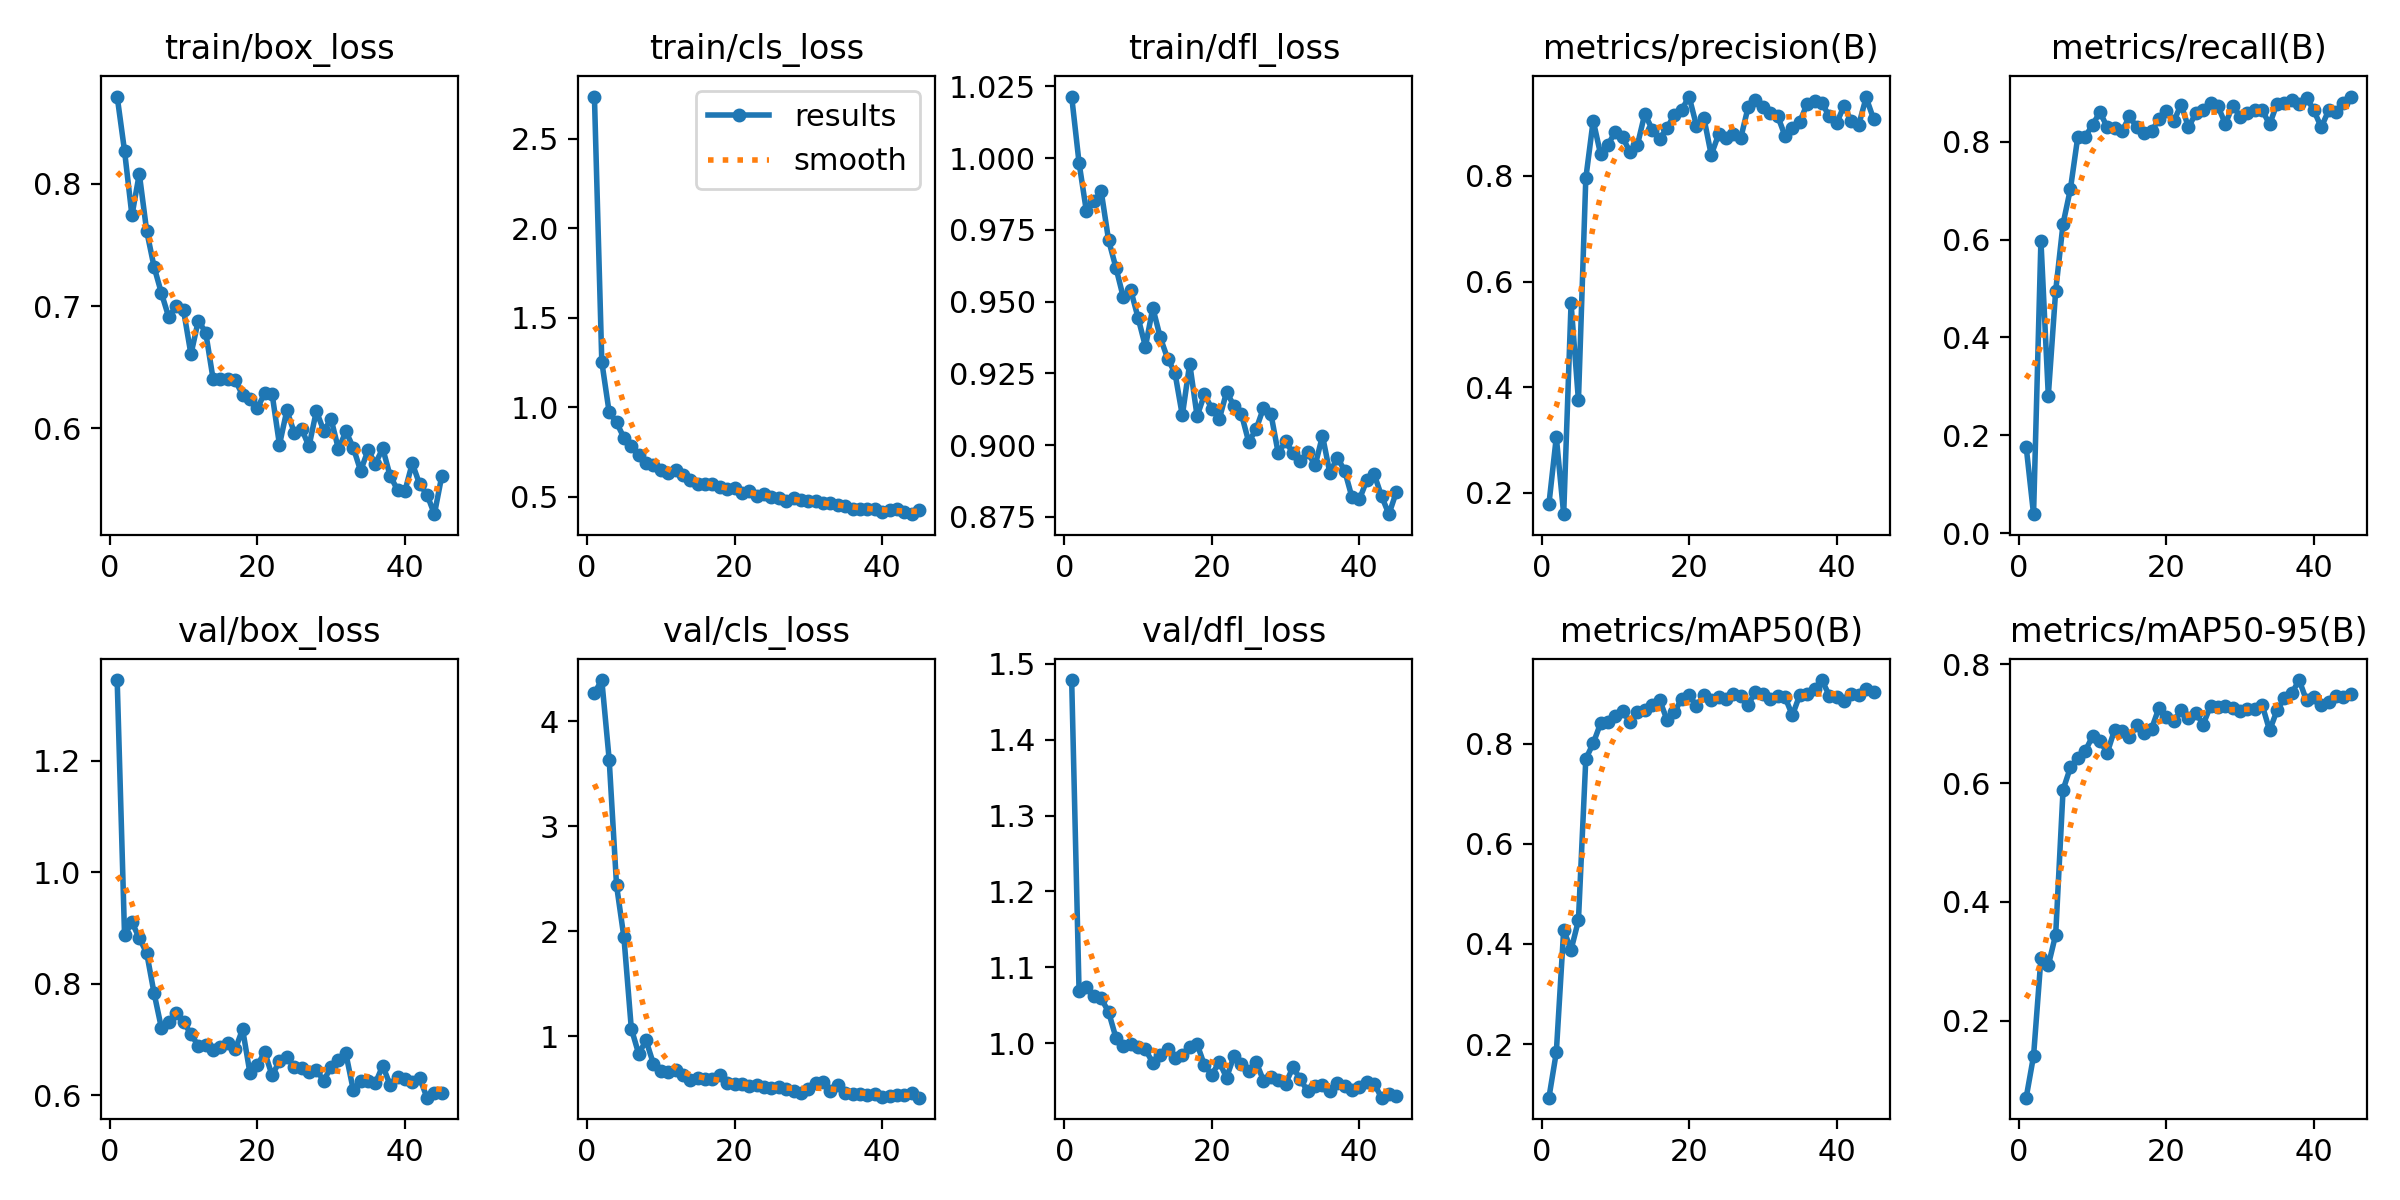

### 📊 YOLOv11-s (Small) - Training Metrics

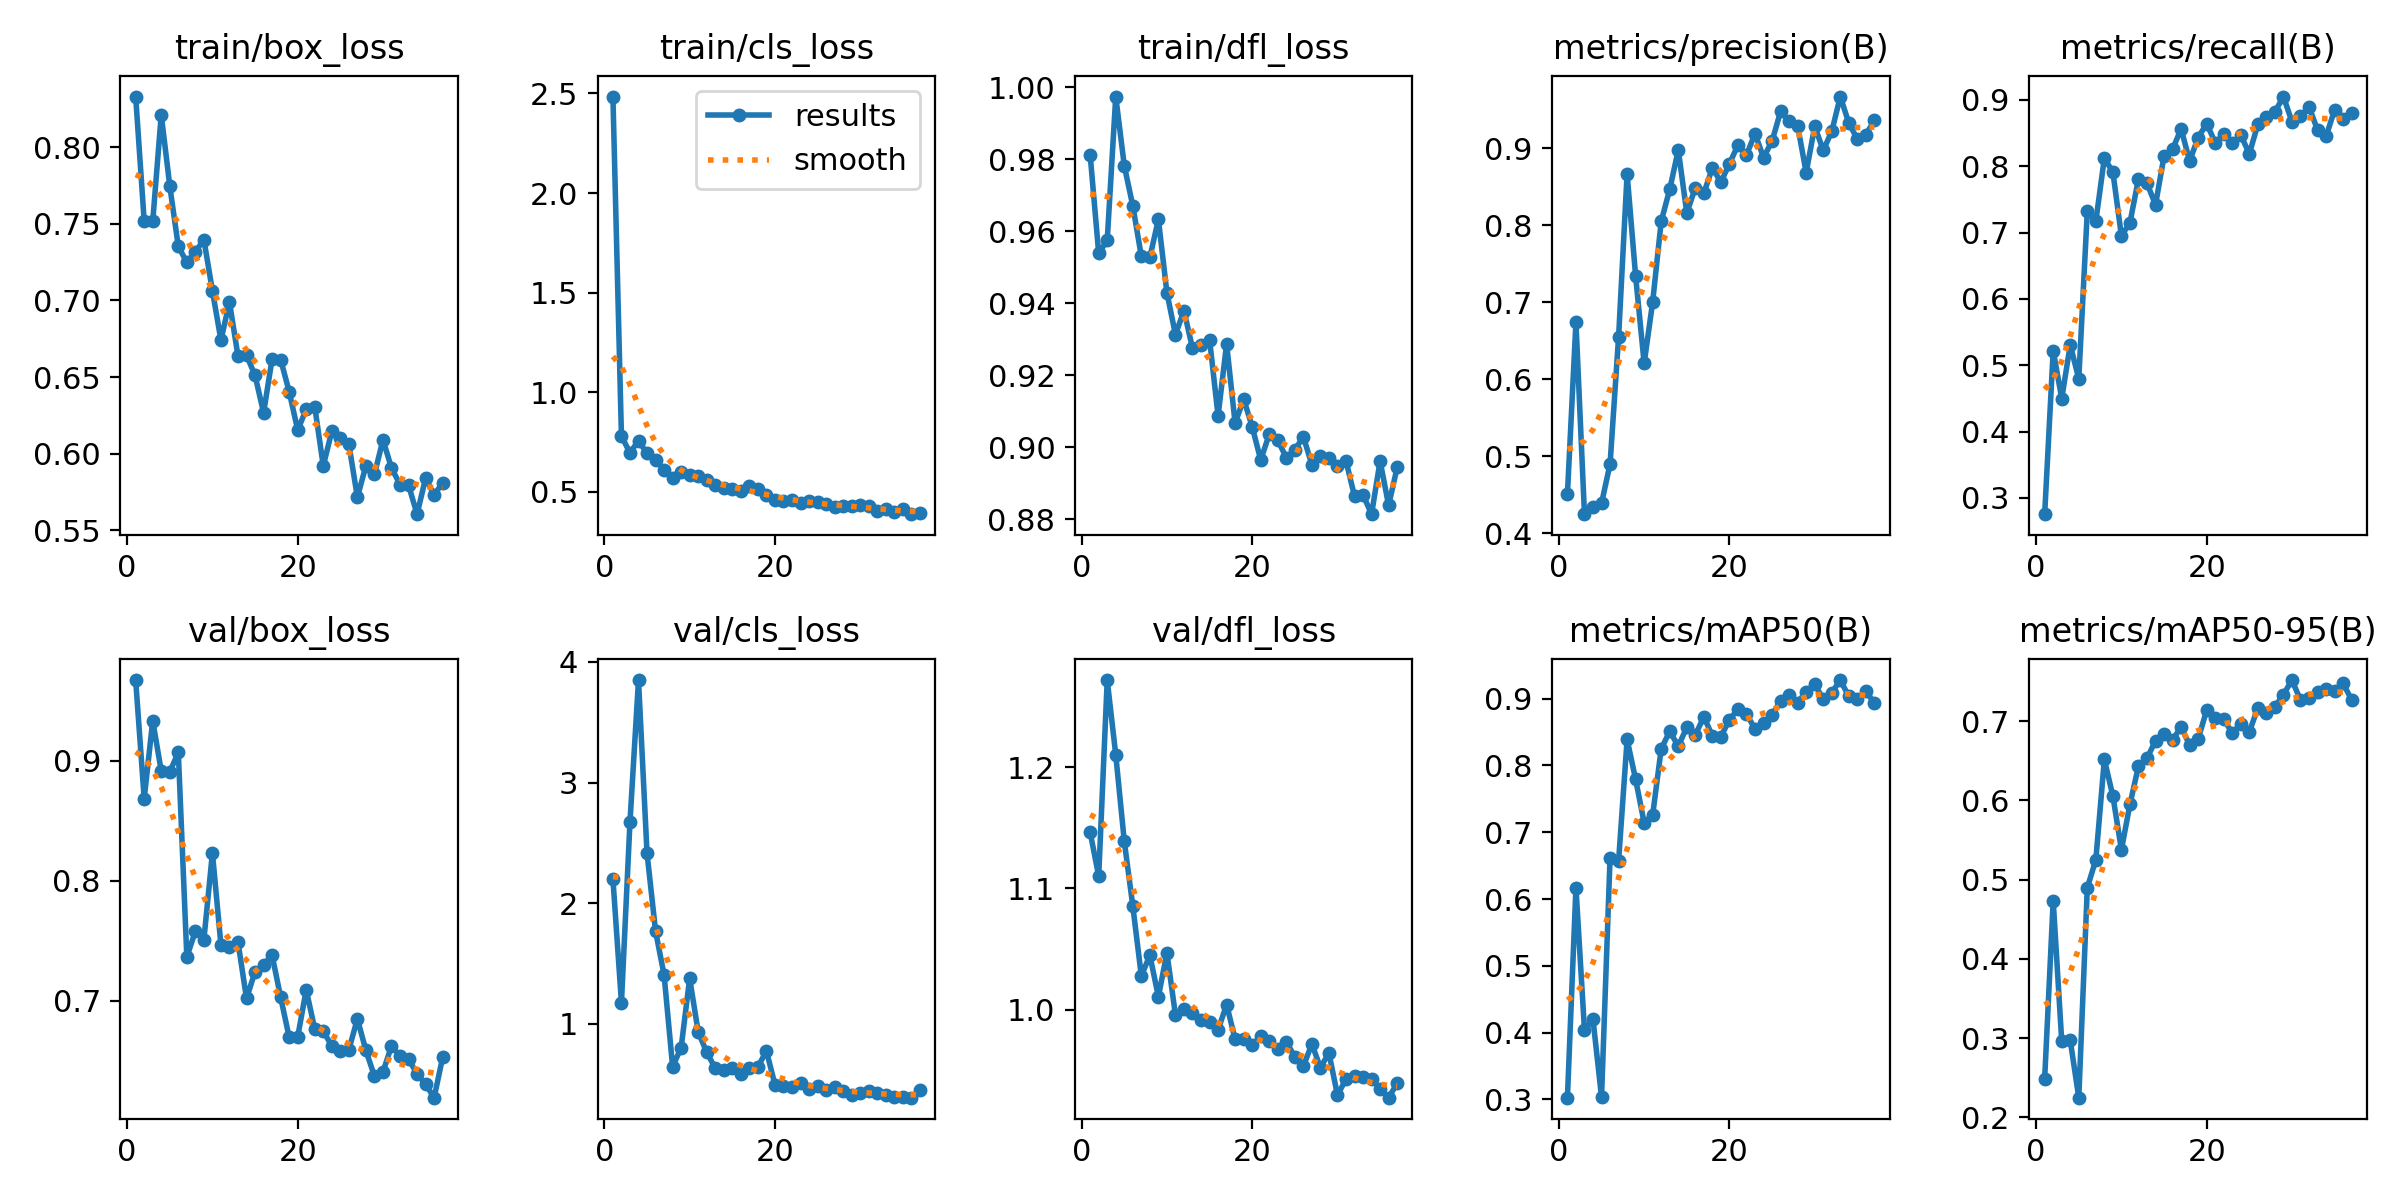

### 📊 YOLOv11-m (Medium) - Training Metrics

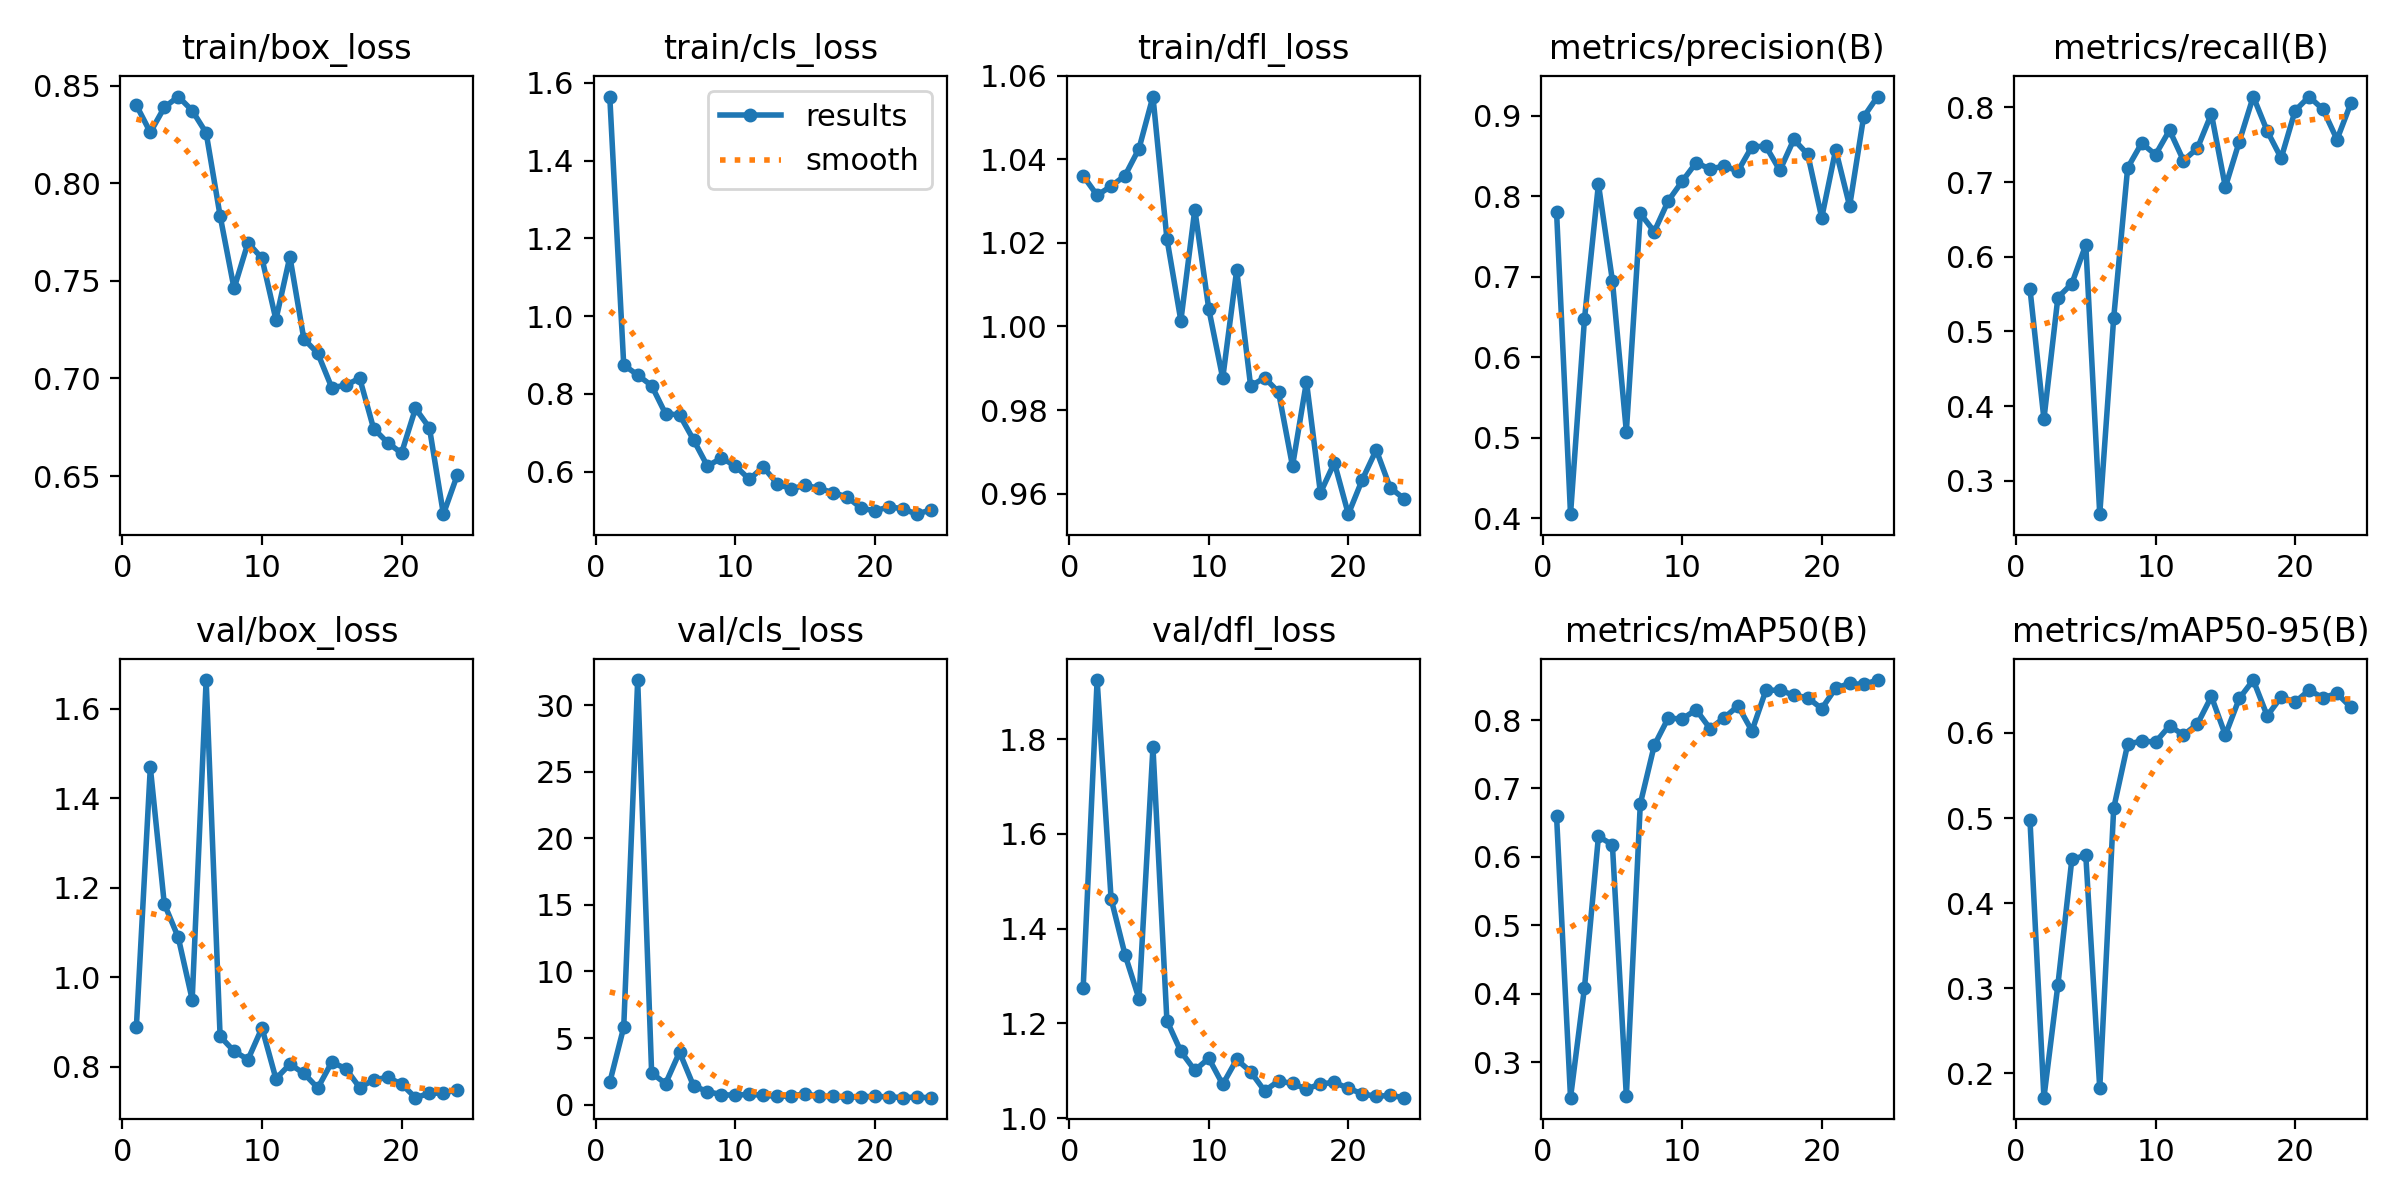

### 🔍 YOLOv11-n (Nano) - Confusion Matrix

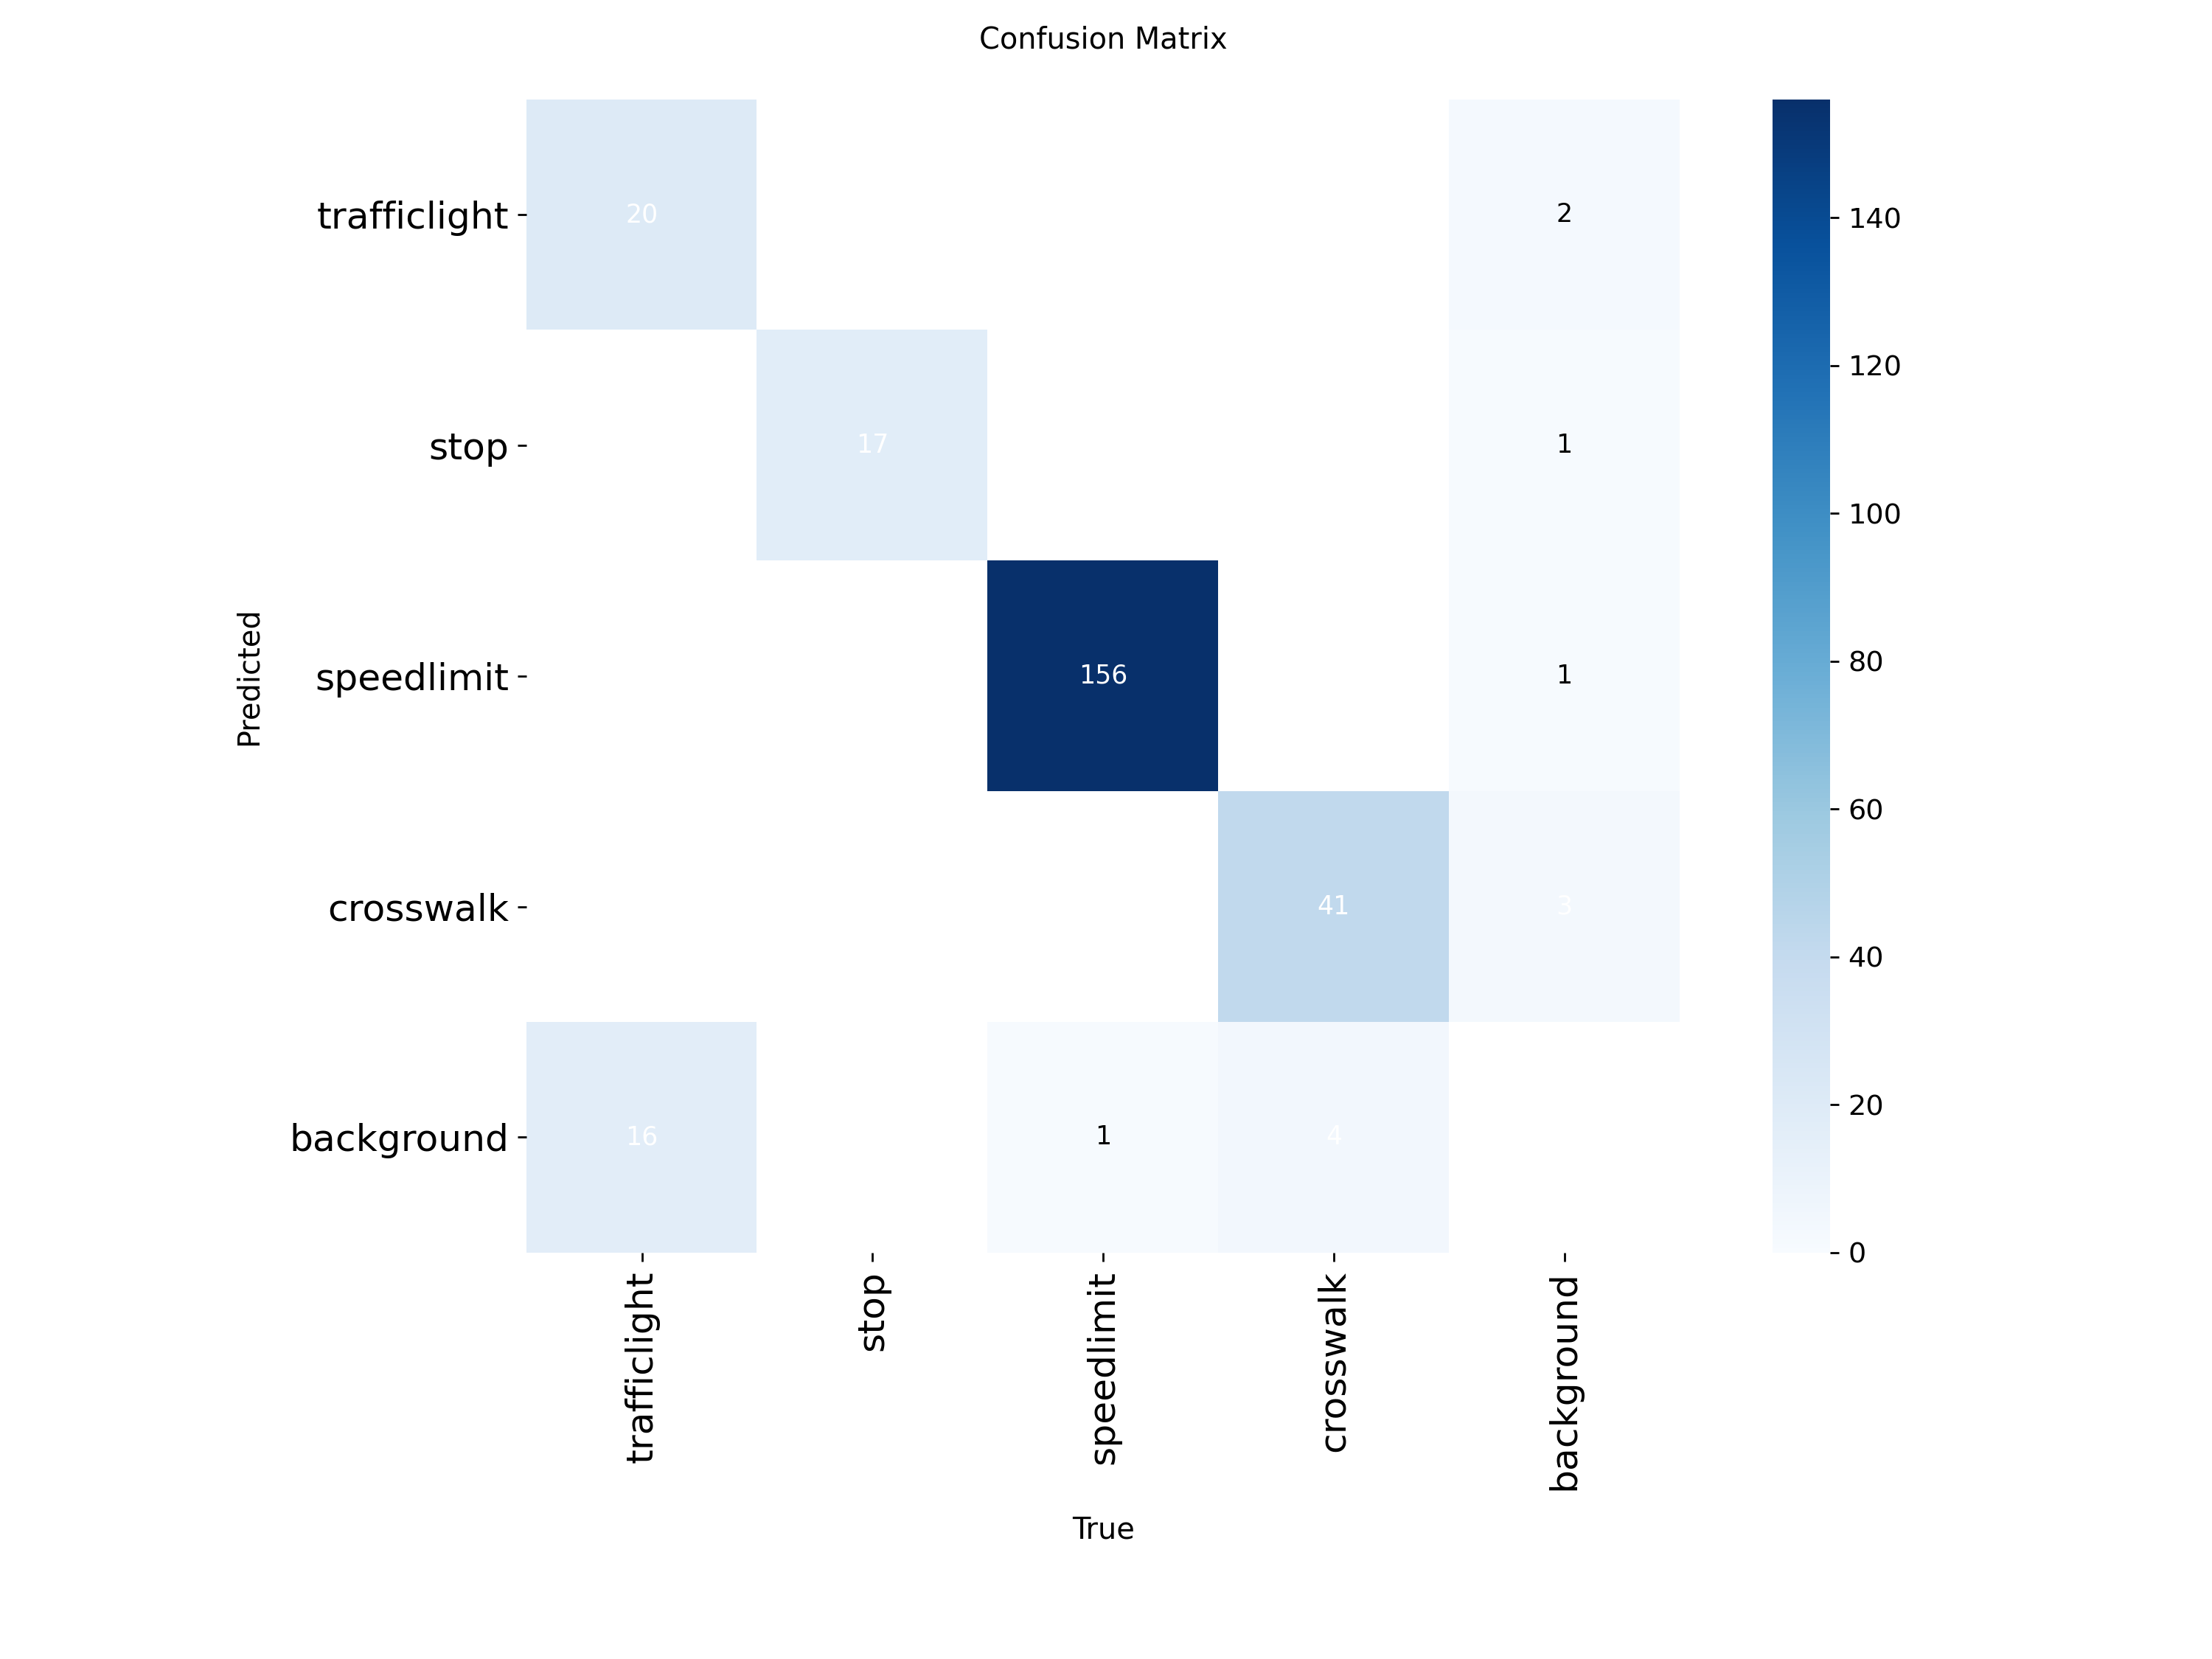

### 🔍 YOLOv11-s (Small) - Confusion Matrix

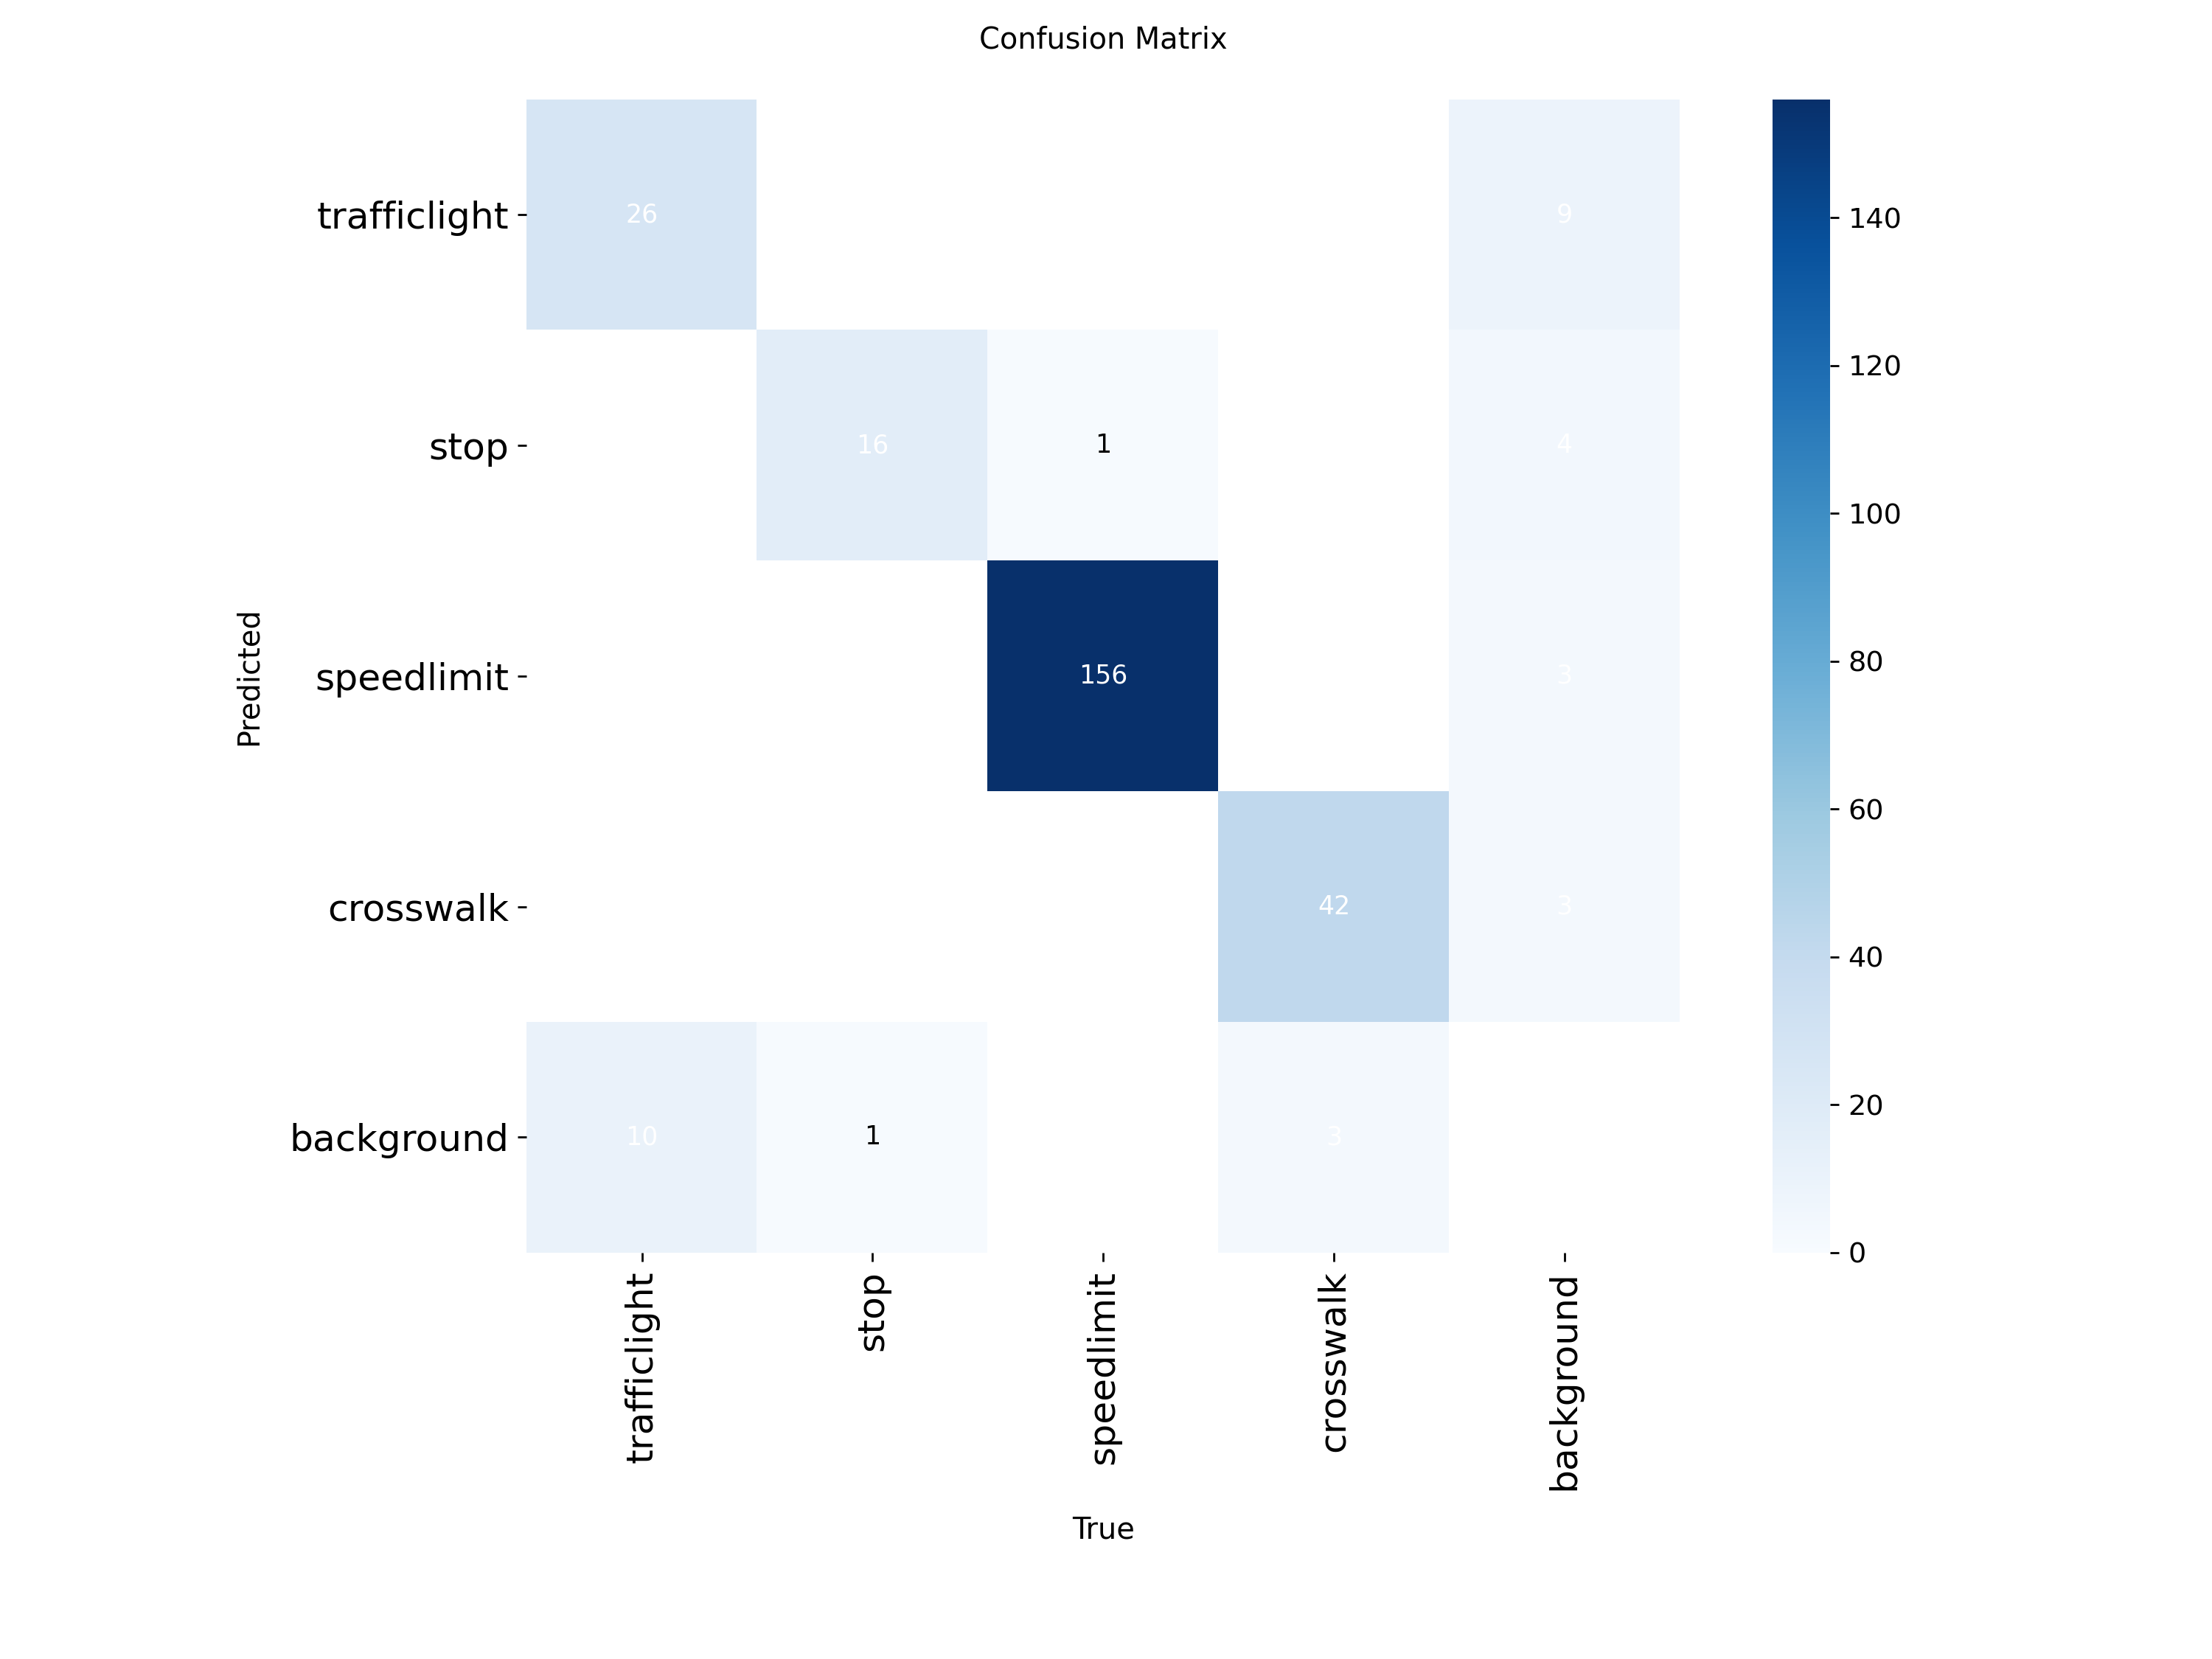

### 🔍 YOLOv11-m (Medium) - Confusion Matrix

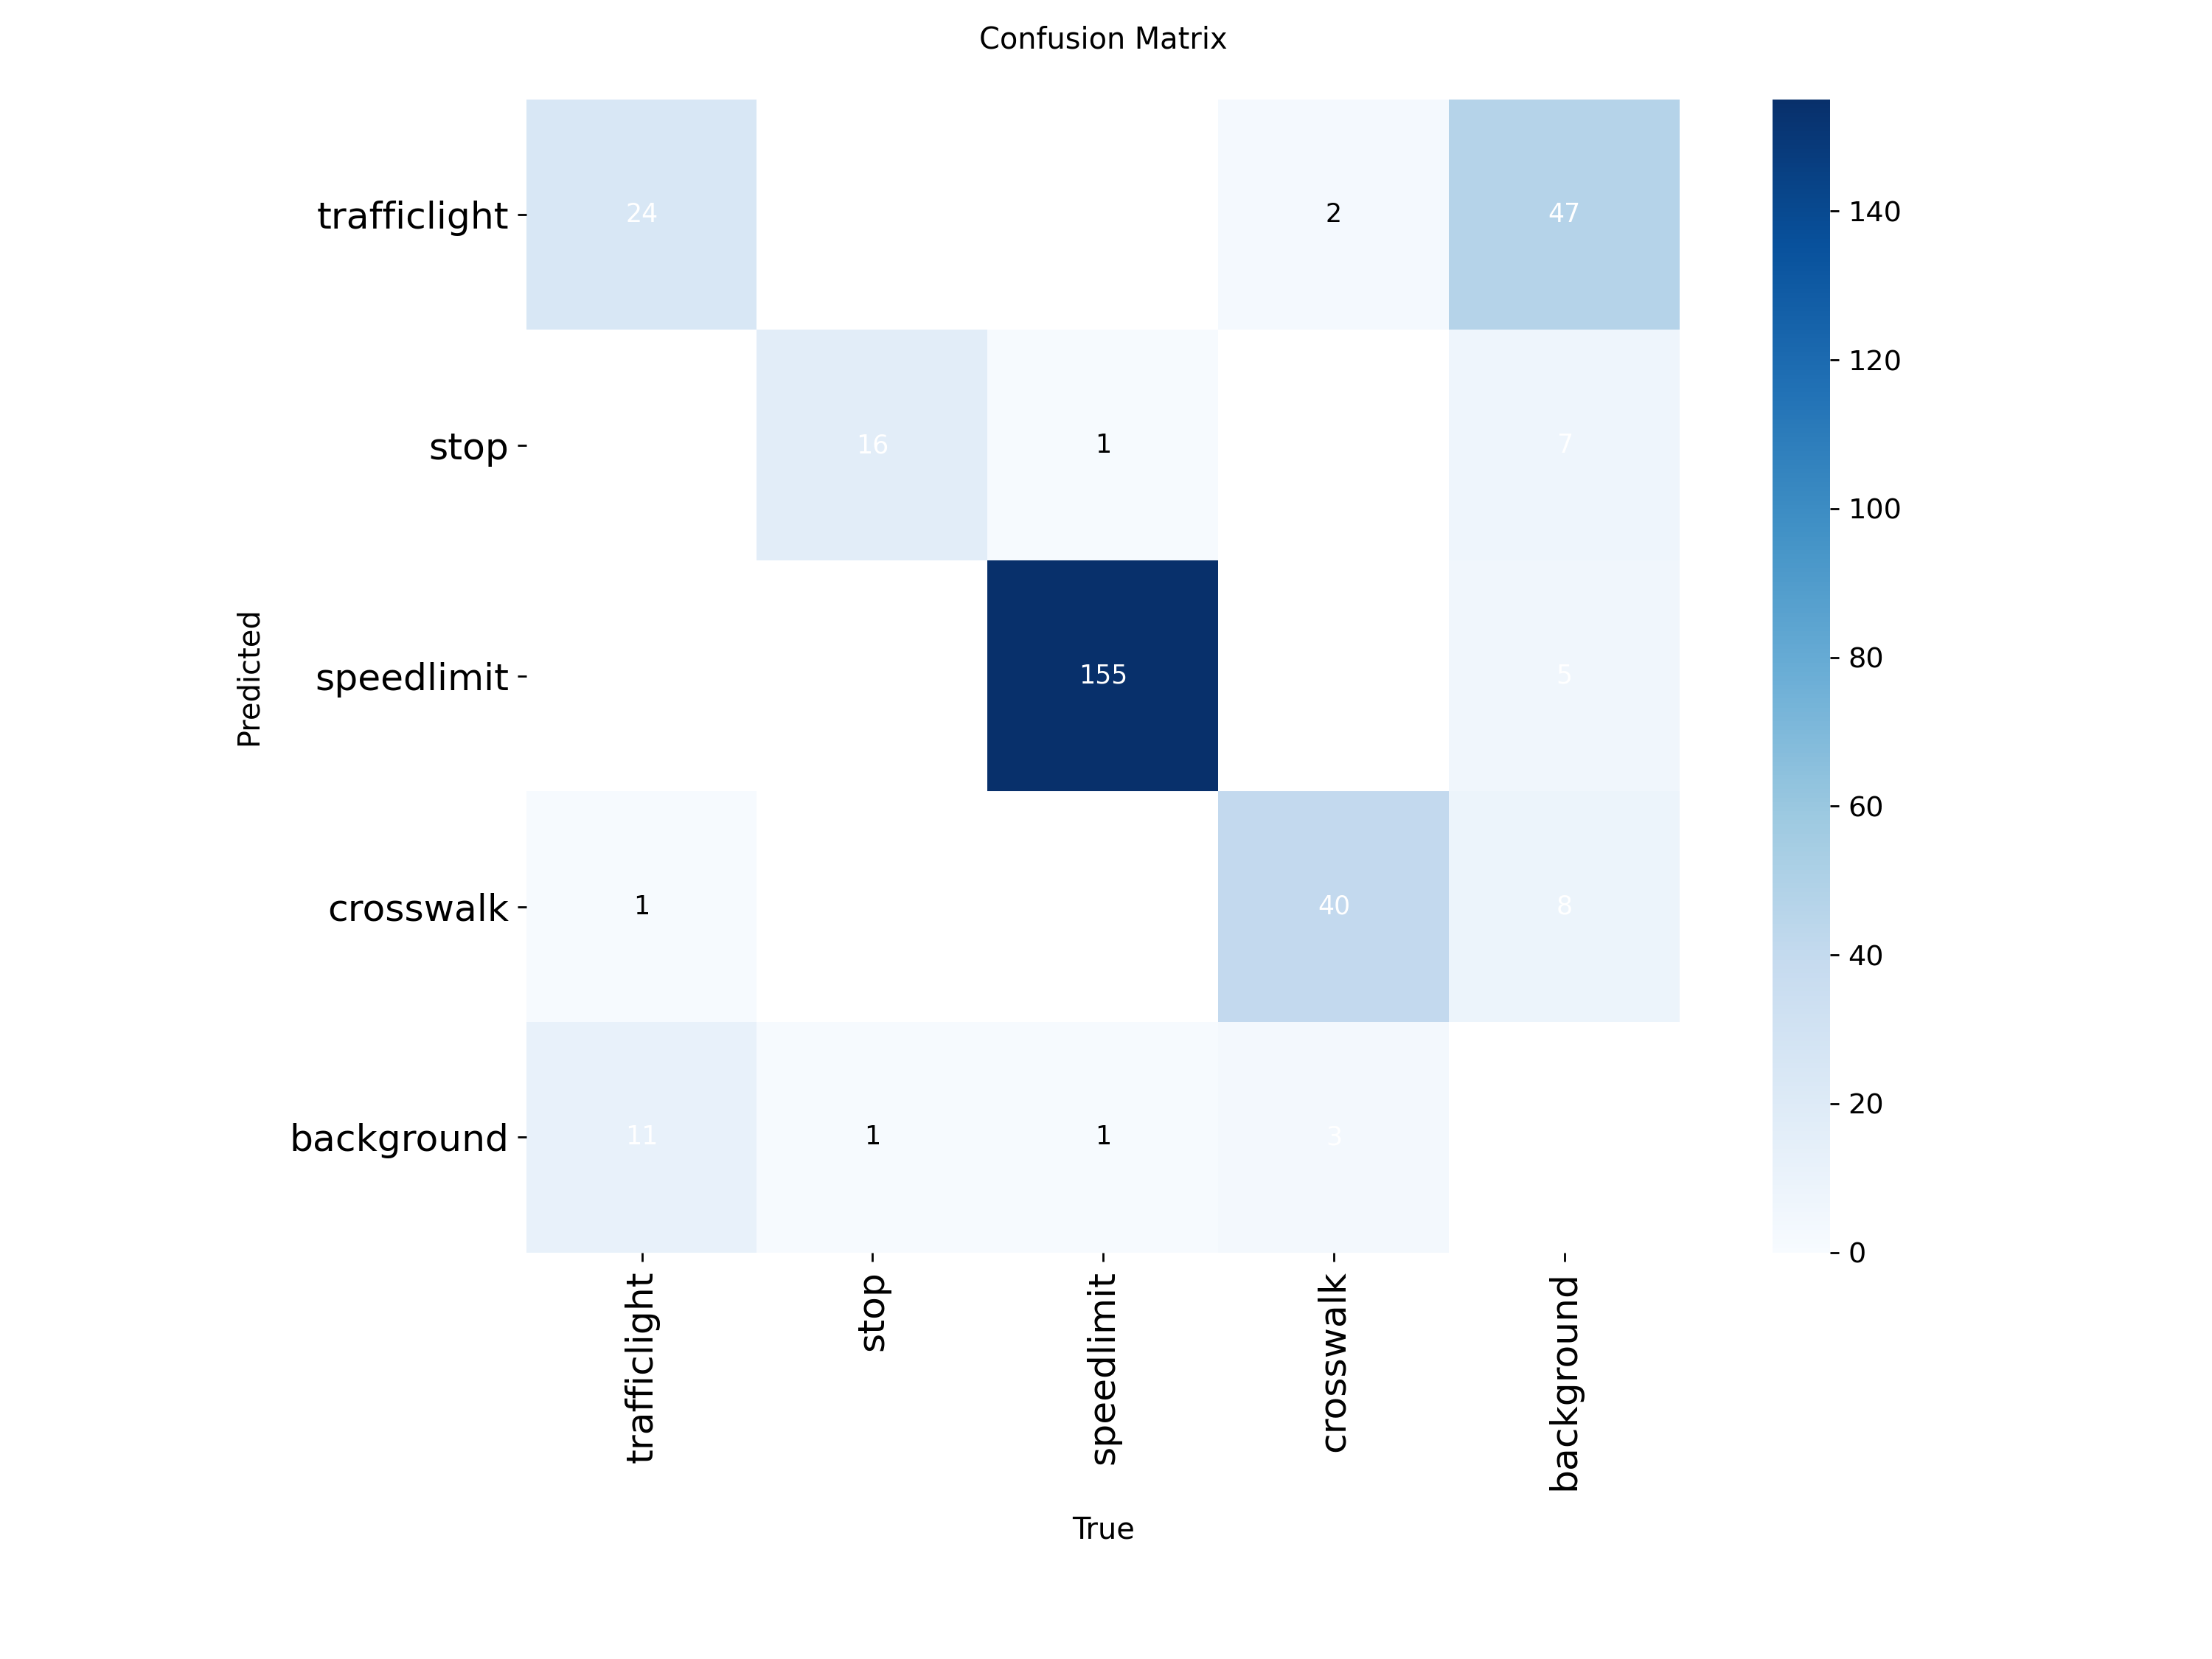

In [58]:
from IPython.display import Image, display, Markdown

# Display results.png for YOLOv11-n
display(Markdown("### 📊 YOLOv11-n (Nano) - Training Metrics"))
display(Image(filename="runs/detect/road_sign_yolov11_n/results.png"))

# Display results.png for YOLOv11-s
display(Markdown("### 📊 YOLOv11-s (Small) - Training Metrics"))
display(Image(filename="runs/detect/road_sign_yolov11_s/results.png"))

# Display results.png for YOLOv11-m
display(Markdown("### 📊 YOLOv11-m (Medium) - Training Metrics"))
display(Image(filename="runs/detect/road_sign_yolov11_m/results.png"))


# Display confusion matrix for YOLOv11-n
display(Markdown("### 🔍 YOLOv11-n (Nano) - Confusion Matrix"))
display(Image(filename="runs/detect/road_sign_yolov11_n/confusion_matrix.png"))

# Display confusion matrix for YOLOv11-s
display(Markdown("### 🔍 YOLOv11-s (Small) - Confusion Matrix"))
display(Image(filename="runs/detect/road_sign_yolov11_s/confusion_matrix.png"))

# Display confusion matrix for YOLOv11-m
display(Markdown("### 🔍 YOLOv11-m (Medium) - Confusion Matrix"))
display(Image(filename="runs/detect/road_sign_yolov11_m/confusion_matrix.png"))



In [50]:
import json
from pathlib import Path

# Paths to trained models
MODEL_PATHS = {
    "YOLOv11-n": "runs/detect/road_sign_yolov11_n/weights/best.pt",
    "YOLOv11-s": "runs/detect/road_sign_yolov11_s/weights/best.pt",
    "YOLOv11-m": "runs/detect/road_sign_yolov11_m/weights/best.pt"
}

# Path to your test dataset
TEST_DATA_PATH = "./road_sign.yaml"  # ensure test is defined inside data.yaml

# Output folder
OUTPUT_FILE = "yolov11_test_metrics.json"


def evaluate_model(name, model_path):
    print(f"\n🔍 Evaluating {name}...")
    model = YOLO(model_path)
    results = model.val(split='test', data=TEST_DATA_PATH, save=False, verbose=False)

    # Parse metrics
    metrics = {
        "Variant": name,
        "Precision": round(results.box.p.mean(), 4),
        "Recall": round(results.box.r.mean(), 4),
        "F1 Score": round(results.box.f1.mean(), 4),
        "mAP@0.5": round(results.box.map50, 4),
        "mAP@0.5:0.95": round(results.box.map, 4),
        "Inference (ms)": round(results.speed["inference"], 2),
        "FPS": round(1000 / results.speed["inference"], 2),
        "Model Size (MB)": round(Path(model_path).stat().st_size / (1024 * 1024), 2)
    }
    return metrics


def main():
    all_metrics = []
    for variant, path in MODEL_PATHS.items():
        metrics = evaluate_model(variant, path)
        all_metrics.append(metrics)

    # Print results
    print("\n📊 YOLOv11 Test Set Evaluation Summary")
    for m in all_metrics:
        print(json.dumps(m, indent=4))

    # Save to JSON
    with open(OUTPUT_FILE, "w") as f:
        json.dump(all_metrics, f, indent=4)
    print(f"\n✅ Metrics saved to {OUTPUT_FILE}")


if __name__ == "__main__":
    main()



🔍 Evaluating YOLOv11-n...
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3060.6±779.6 MB/s, size: 238.8 KB)


val: Scanning /kaggle/working/road-sign-dataset/test/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.14it/s]


                   all         88        122      0.983      0.954       0.98      0.816


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 3.7ms preprocess, 4.5ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val16

🔍 Evaluating YOLOv11-s...
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2736.5±693.2 MB/s, size: 249.8 KB)


val: Scanning /kaggle/working/road-sign-dataset/test/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]


                   all         88        122      0.961       0.96      0.989      0.835


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 3.8ms preprocess, 7.8ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val17

🔍 Evaluating YOLOv11-m...
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,033,116 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1514.5±464.1 MB/s, size: 223.0 KB)


val: Scanning /kaggle/working/road-sign-dataset/test/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100%|██████████| 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.79it/s]


                   all         88        122      0.956      0.891      0.959      0.788


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 5.6ms preprocess, 21.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val18

📊 YOLOv11 Test Set Evaluation Summary
{
    "Variant": "YOLOv11-n",
    "Precision": 0.9828,
    "Recall": 0.9538,
    "F1 Score": 0.9676,
    "mAP@0.5": 0.9804,
    "mAP@0.5:0.95": 0.8164,
    "Inference (ms)": 4.54,
    "FPS": 220.45,
    "Model Size (MB)": 5.21
}
{
    "Variant": "YOLOv11-s",
    "Precision": 0.9609,
    "Recall": 0.9599,
    "F1 Score": 0.9604,
    "mAP@0.5": 0.9892,
    "mAP@0.5:0.95": 0.8349,
    "Inference (ms)": 7.8,
    "FPS": 128.2,
    "Model Size (MB)": 18.28
}
{
    "Variant": "YOLOv11-m",
    "Precision": 0.9563,
    "Recall": 0.8914,
    "F1 Score": 0.9205,
    "mAP@0.5": 0.9586,
    "mAP@0.5:0.95": 0.7879,
    "Inference (ms)": 21.35,
    "FPS": 46.85,
    "Model Size (MB)": 38.63
}

✅ Metrics saved to yolov11_test_metrics.json


## 📊 YOLOv11 Test Set Evaluation Summary

| **Metric**             | **YOLOv11-n 🟢 (Nano)** | **YOLOv11-s 🟡 (Small)** | **YOLOv11-m 🔴 (Medium)** |
|------------------------|-------------------------|---------------------------|----------------------------|
| **Model Size (MB)**    | 5.21                    | 18.28                     | 38.63                      |
| **Precision**          | 0.9828                  | 0.9609                    | 0.9563                     |
| **Recall**             | 0.9538                  | 0.9599                    | 0.8914                     |
| **F1 Score**           | 0.9676                  | 0.9604                    | 0.9205                     |
| **mAP@0.5**            | 0.9804                  | 0.9892                    | 0.9586                     |
| **mAP@0.5:0.95**       | 0.8164                  | 0.8349                    | 0.7879                     |
| **Inference Time (ms)**| 4.54                    | 7.80                      | 21.35                      |
| **FPS**                | 220.45                  | 128.20                    | 46.85                      |

---

## 🧠 Key Insights (Test Set)

### ✅ Best Real-Time & Overall Trade-off: **YOLOv11-n (Nano)**
- ⚡ Fastest inference and highest FPS (**220.45**)
- 🔋 Smallest model (**5.21 MB**)
- 📈 Very high precision (**0.9828**), recall (**0.9538**), and F1 (**0.9676**)
- ✅ Best for **real-time, edge devices, or latency-sensitive applications**

---

### 🎯 Best Accuracy: **YOLOv11-s (Small)**
- 📌 Best overall mAP@0.5 (**0.9892**) and mAP@0.5:0.95 (**0.8349**)
- 🧠 Balanced F1 Score (**0.9604**) and Recall (**0.9599**)
- ✅ Ideal when **accuracy is the top priority** over slight speed differences

---

### ⚠️ Needs Improvement: **YOLOv11-m (Medium)**
- 🐢 Slowest inference time (**21.35 ms**)
- 📉 Lowest F1 Score (**0.9205**) and mAP@0.5:0.95 (**0.7879**)
- 🧪 May require **more training, data augmentation, or tuning** to justify its size


## 🏆 Recommended Model: YOLOv11-n 🟢 (Nano)

---

### 🔍 Why YOLOv11-n?

| **Criteria**             | **YOLOv11-n Performance** | **Remarks**                                               |
|--------------------------|----------------------------|------------------------------------------------------------|
| 🧠 **F1 Score (Test)**    | 0.9676                     | Highest — best balance between precision & recall          |
| 🎯 **mAP@0.5 (Test)**     | 0.9804                     | Very close to the best (YOLOv11-s at 0.9892)               |
| 📊 **mAP@0.5:0.95 (Test)**| 0.8164                     | Solid generalization (better than YOLOv11-m)               |
| ⚡ **Inference Time**     | 4.54 ms                    | Fastest across all variants                               |
| 🚀 **FPS**                | 220.45                     | Ideal for real-time or edge applications                   |
| 📦 **Model Size**         | 5.21 MB                    | Ultra-lightweight for embedded/low-resource devices        |
| 💡 **Training Metrics**   | Competitive across all core metrics | Doesn't overfit, maintains strong performance   |

---

### 🧠 Use Case Recommendation:

- ✅ **Best for**: Real-time detection, edge devices, low-latency systems (e.g., cameras, traffic systems, drones).
- ❗**Avoid only if**: You must have slightly higher accuracy and can afford higher latency — then **YOLOv11-s** is acceptable.
